# Validation metrics San Pedro

# Bayesian Iteration 1 Validation San Pedro

14:05:20 - cmdstanpy - INFO - CmdStan start processing






































































































































































































chain 1 |██████████| 00:37 Sampling completed                      
chain 2 |██████████| 00:37 Sampling completed                      
chain 3 |██████████| 00:37 Sampling completed                      
chain 4 |██████████| 00:37 Sampling completed                      


14:05:58 - cmdstanpy - INFO - CmdStan done processing.
14:05:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


14:05:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 7 divergent transitions (1.4%)
	Chain 2 had 10 divergent transitions (2.0%)
	Chain 3 had 2 divergent transitions (0.4%)
	Chain 4 had 18 divergent transitions (3.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


MAE: 103.75037096774196
NMAE: 0.6746929934969583
RMSE: 115.15489330452183
MSE: 13260.649451975809


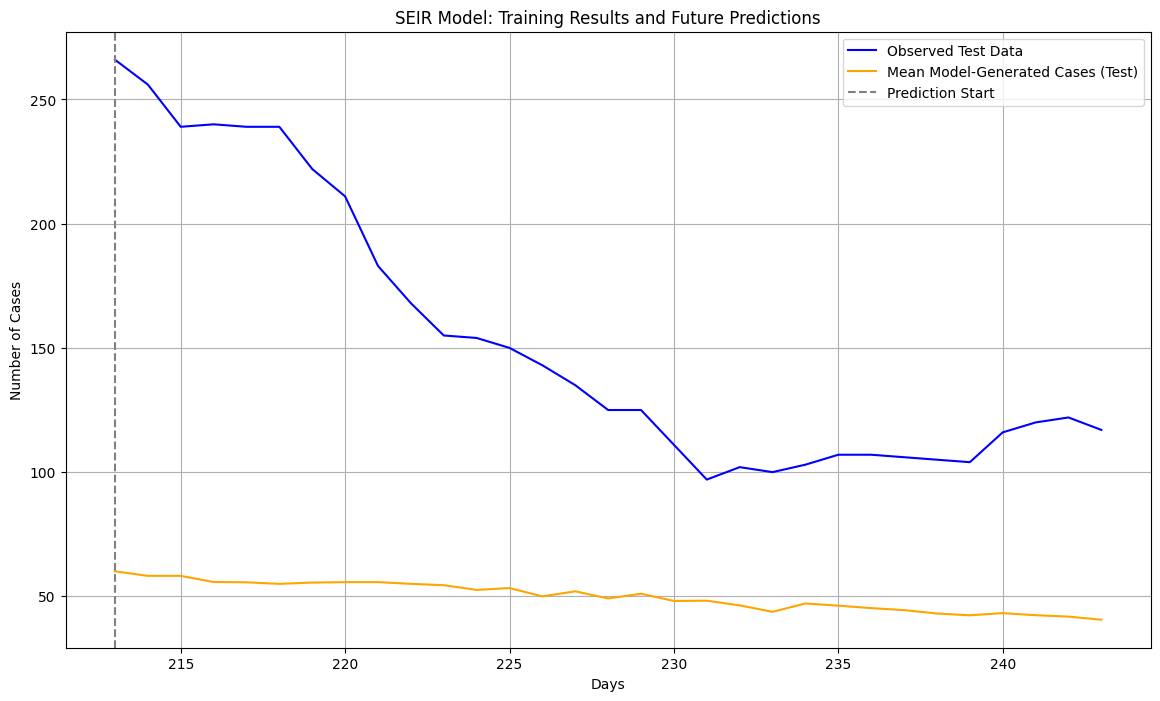

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from cmdstanpy import set_cmdstan_path,CmdStanModel

from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

cmdstan_path = r'C:\\Users\\jhnbr\\.cmdstan\\cmdstan-2.35.0'
set_cmdstan_path(cmdstan_path)

population = 373000



df = pd.read_csv('san_pedro_cases_rounded.csv', parse_dates=['date'])
model = CmdStanModel(stan_file=r'C:\\Users\\jhnbr\\Documents\\Github\SEIR_DJANGO-WebTest\\transformation\dataset\\models\seir_optimized_fixed_bugs.stan')

e0 = 1
t0 = 0
train_data = df[(df['date'] >= '2022-01-13') & 
                    (df['date'] <= '2022-08-13') 
                    ]
test_data = df[(df['date'] >= '2022-08-14') & 
                   (df['date'] <= '2022-09-13') 
                  ]

days = len(train_data)
days_to_predict = len(test_data)
train_cases = train_data['count_Infectious'].values
test_cases = test_data['count_Infectious'].values
train_date = pd.to_datetime(train_data['date'].values)  # Convert date column to datetime
i0 = train_cases[0]
ts = np.arange(1, days + 1, dtype=float)

stan_data = {
        "n_days": days,
        "t0": t0,
        "ts": ts,
        "N": population,
        "cases": train_cases.astype(int), 
        "i0": i0,
        "n_pred_days": days_to_predict
    }

    # Compile and fit the model
fit = model.sample(data=stan_data, iter_warmup=500, iter_sampling=500, chains=4, parallel_chains=4,adapt_delta=0.9, seed=42)
generated_cases = fit.stan_variable("pred_cases")
predicted_cases_future = fit.stan_variable("pred_cases_future")

# Calculate mean predictions
mean_generated_cases = np.mean(generated_cases, axis=0)
mean_predicted_cases_future = np.mean(predicted_cases_future, axis=0)

mae = mean_absolute_error(test_cases, mean_predicted_cases_future)
norm_factor = np.mean(np.abs(test_cases))
nmae_test = mae / norm_factor
mse = mean_squared_error(test_cases, mean_predicted_cases_future)
rmse = mse**(1/2)
mape = mean_absolute_percentage_error(test_cases, mean_predicted_cases_future) 


print(f"MAE: {mae}")
print(f"NMAE: {nmae_test}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

t = np.linspace(days, days + days_to_predict - 1, days_to_predict )
ts = np.linspace(0, days - 1, days )
plt.figure(figsize=(14, 8))

#plt.plot(ts, train_cases,label="Observed Train Data", color="red")
# Plot observed cases for training
plt.plot(t, test_cases, label="Observed Test Data", color="blue")

# plt.plot(ts, mean_generated_cases,label="Mean Model-Generated Cases (Train)", color="green")
# Plot model results for training
plt.plot(t, mean_predicted_cases_future, label="Mean Model-Generated Cases (Test)", color="orange")


# Add labels and legend
plt.axvline(x=len(mean_generated_cases), linestyle='--', color='gray', label="Prediction Start")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("SEIR Model: Training Results and Future Predictions")
plt.legend()
plt.grid()
plt.show()



# Bayesian Iteration 2 Validation San Pedro

14:18:38 - cmdstanpy - INFO - CmdStan start processing


213













































































































































































































chain 1 |██████████| 00:41 Sampling completed                      
chain 2 |██████████| 00:41 Sampling completed                      
chain 3 |██████████| 00:41 Sampling completed                      
chain 4 |██████████| 00:41 Sampling completed                      


14:19:19 - cmdstanpy - INFO - CmdStan done processing.
14:19:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


14:19:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 18 divergent transitions (3.6%)
	Chain 2 had 6 divergent transitions (1.2%)
	Chain 3 had 7 divergent transitions (1.4%)
	Chain 4 had 13 divergent transitions (2.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


beta: 0.1072739875, gamma: 0.110418999, sigma: 0.1270158015
MAE : 62.04519237853655, NMAE: 0.40348247613480864, MSE: 5074.456267246448, RMSE: 71.2352178858635


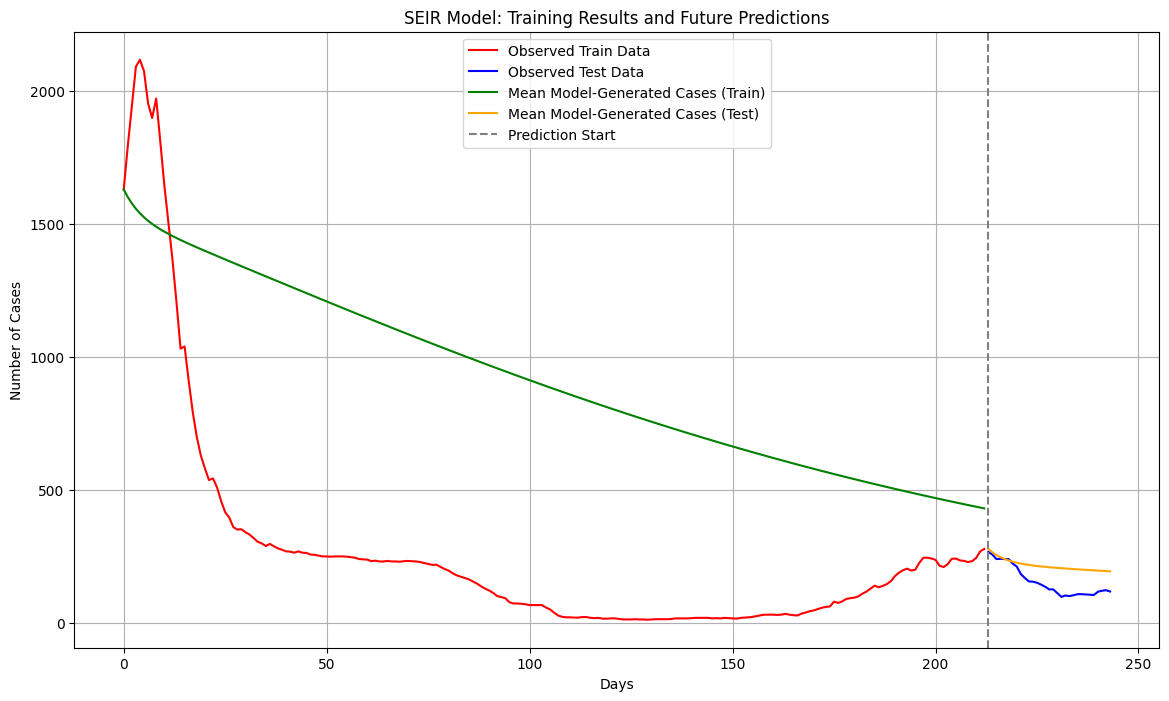

In [26]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
from cmdstanpy import set_cmdstan_path,CmdStanModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.integrate import odeint
import matplotlib.pyplot as plt

cmdstan_path = r'C:\\Users\\jhnbr\\.cmdstan\\cmdstan-2.35.0'
set_cmdstan_path(cmdstan_path)


def seir_ode(y, t,  beta, sigma, gamma):
    S, E, I, R = y
    dS_dt = -beta * I * S / population
    dE_dt = beta * I * S / population - sigma * E
    dI_dt = sigma * E - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dE_dt, dI_dt, dR_dt]

df = pd.read_csv('san_pedro_cases_rounded.csv', parse_dates=['date'])
model = CmdStanModel(stan_file=r'C:\\Users\\jhnbr\\Documents\\Github\SEIR_DJANGO-WebTest\\transformation\dataset\\models\seir_model.stan')


train_data = df[(df['date'] >= '2022-01-13') & 
                    (df['date'] <= '2022-08-13') 
                    ]
test_data = df[(df['date'] >= '2022-08-14') & 
                   (df['date'] <= '2022-09-13') 
                  ]
train_dates = pd.to_datetime(train_data['date'])
test_dates = pd.to_datetime(test_data['date'])
n_days = len(train_dates)
n_pred_days = len(test_data)
print(n_days)
cases = train_data['count_Infectious'].values
test_cases = test_data['count_Infectious'].values
population = 373000


stan_data = {
    "n_days": n_days,
    "t0": 0,
    "ts": np.arange(1, n_days + 1),
    "N": int(population),
    "cases": cases.tolist(),
    "i0": train_data['count_Infectious'].values[0] ,  # Initial infectious individuals
}


    # Compile and fit the model
fit = model.sample(data=stan_data, iter_warmup=500, iter_sampling=500, chains=4, parallel_chains=4,adapt_delta=0.9, seed=42)



lambda_ = np.mean(fit.stan_variable("infectious_rate"))
sigma = np.mean(fit.stan_variable("incubation_rate"))
gamma = np.mean(fit.stan_variable("recovery_rate"))
beta = lambda_
gamma = gamma
print(f'beta: {beta}, gamma: {gamma}, sigma: {sigma}')
# Calculate mean predictions
# Calculate mean predictions
# mean_generated_cases = np.mean(generated_cases, axis=0)
# mean_predicted_cases_future = np.mean(predicted_cases_future, axis=0)
E = train_data['count_Exposed'].values[0]
I = train_data['count_Infectious'].values[0]
R = train_data['count_Recovered'].values[0]
S = population - E - I - R
initial_conditions = [S, E, I, R]

e_test = train_data['count_Exposed'].values[-1]
i_test = train_data['count_Infectious'].values[-1]
r_test = train_data['count_Recovered'].values[-1]
s_test = population - e_test - i_test - r_test
initial_conditions_test = [s_test, e_test,i_test, r_test]

t_train = np.arange(len(train_data))
t_test = np.arange(len(train_data), len(train_data) + len(test_data) )

predicted_solution = odeint(seir_ode, initial_conditions_test, t_test, args=(beta, sigma, gamma))
I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
I_pred_train = np.clip(odeint(seir_ode, initial_conditions, np.arange(len(train_data)), args=(beta, sigma, gamma))[:, 2], 0, None)

mae_test = mean_absolute_error(I_pred_test, test_cases )
norm_factor = np.mean(np.abs(test_cases))
nmae_test = mae_test / norm_factor
mse_test = mean_squared_error(test_cases,I_pred_test)
rmse_test = np.sqrt(mse_test)
train_date = pd.to_datetime(train_data['date'].values)
observed_dates = train_date
future_dates = [train_date[-1] + timedelta(days=i) for i in range(1, len(test_data) + 1)]

print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")


t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
ts = np.linspace(0, n_days - 1, days )
plt.figure(figsize=(14, 8))

plt.plot(ts, train_cases,label="Observed Train Data", color="red")
# Plot observed cases for training
plt.plot(t, test_cases, label="Observed Test Data", color="blue")

plt.plot(ts, I_pred_train,label="Mean Model-Generated Cases (Train)", color="green")
# Plot model results for training
plt.plot(t, I_pred_test, label="Mean Model-Generated Cases (Test)", color="orange")


# Add labels and legend
plt.axvline(x=len(I_pred_train), linestyle='--', color='gray', label="Prediction Start")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("SEIR Model: Training Results and Future Predictions")
plt.legend()
plt.grid()
plt.show()


# SEIR Validation San Pedro

MAE: 150.65834930667012
NMAE: 0.9797375348241606
RMSE: 160.12152865790205
MSE: 25638.903939743348


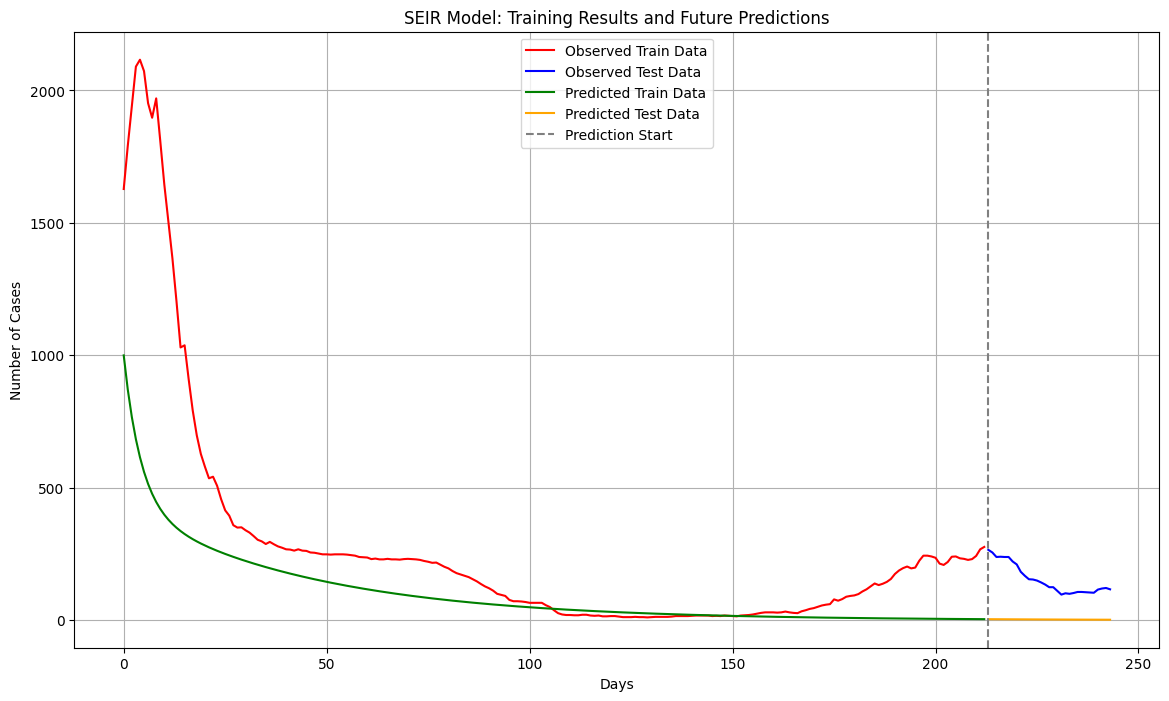

In [13]:
from scipy.integrate import odeint

def seir(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

metrics = []
# SEIR parameters
population = 373000
beta = 0.1  # Infection rate
sigma = 1/9  # Incubation rate
gamma = 1/6.9  # Recovery rate

# Initial conditions
I0 = 1000  # Initial infected (first day's cases)
E0 = 10
S0 = population - I0 - E0  # Susceptible
R0 = 0  # Recovered
y0 = S0, E0, I0, R0
metrics = []
# SEIR parameters

days = len(train_cases)  # Set the number of training days
days_to_predict = len(test_cases)  # Set the number of days to predict
t = np.linspace(0, days + days_to_predict - 1, days + days_to_predict)

# You need the `train_cases` and `test_cases` data from your original dataset
# For the sake of this example, we'll assume these arrays are available
# train_cases = ... 
# test_cases = ...

# Solve SEIR model
result = odeint(seir, y0, t, args=(population, beta, sigma, gamma))
S, E, I, R = result.T

# Predicted and actual cases
predicted_cases = I
train_predicted_cases = predicted_cases[:days]  # Crop predicted cases for training period
test_predicted_cases = predicted_cases[days:]  # Crop predicted cases for test period

# Evaluate the model (using test_cases for evaluation)
mae = mean_absolute_error(test_cases, test_predicted_cases)
norm_factor = np.mean(np.abs(test_cases))
nmae_test = mae / norm_factor
mse = mean_squared_error(test_cases, test_predicted_cases)
rmse = mse ** (1/2)
mape = mean_absolute_percentage_error(test_cases, test_predicted_cases) * 100
print(f"MAE: {mae}")
print(f"NMAE: {nmae_test}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

# Create the plot for the results
ts = np.linspace(0, days - 1, days)
t_future = np.linspace(days, days + days_to_predict - 1, days_to_predict)

plt.figure(figsize=(14, 8))

# Plot observed data and predicted results
plt.plot(ts, train_cases, label="Observed Train Data", color="red")
plt.plot(t_future, test_cases, label="Observed Test Data", color="blue")

# Plot cropped model results for training and test set
plt.plot(ts, train_predicted_cases, label="Predicted Train Data", color="green")
plt.plot(t_future, test_predicted_cases, label="Predicted Test Data", color="orange")

# Add labels, vertical line for prediction start, and title
plt.axvline(x=days, linestyle='--', color='gray', label="Prediction Start")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("SEIR Model: Training Results and Future Predictions")
plt.legend()
plt.grid()
plt.show()

# Simulated Annealing Validation San Pedro

beta: 0.014141954821405643, sigma: 0.4862641455743272, gamma: 0.08007029419070968
MAE : 38.758203638532784, NMAE: 0.25204621623547646, MSE: 1882.3955244866902, RMSE: 43.38658230935793


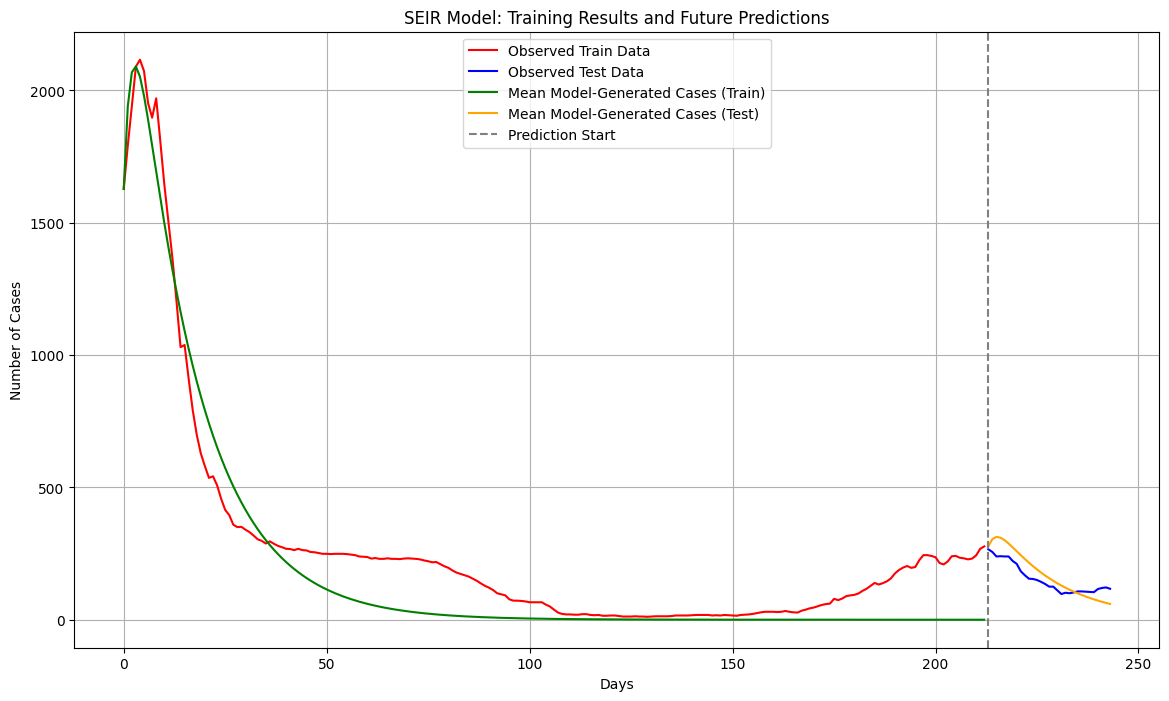

In [28]:
from scipy.integrate import odeint
from scipy.optimize import dual_annealing
from datetime import timedelta
population = 373000
df = pd.read_csv('san_pedro_cases_rounded.csv', parse_dates=['date'])

train_data = df[(df['date'] >= '2022-01-13') & 
                    (df['date'] <= '2022-08-13') 
                    ]
test_data = df[(df['date'] >= '2022-08-14') & 
                   (df['date'] <= '2022-09-13') 
                  ]
def seir(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / population
    dEdt = beta * S * I / population - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

def objective_function(params, train_data):
    beta, sigma, gamma = params
    initial_conditions = [S, E, I, R]
    t = np.arange(len(train_data))
    
    # Solve SEIR Model
    solution = odeint(seir, initial_conditions, t, args=(beta, sigma, gamma))
    I_pred = solution[:, 2]  # Predicted Infected
    I_pred = np.clip(I_pred, 0, None)  # Ensure non-negative predictions

    # Calculate Error
    I_actual = train_data['count_Infectious'].values
    error = np.mean((I_pred - I_actual) ** 2)
    
    # Regularization term to prevent extreme parameter values
    reg_term = 0.01 * (beta ** 2 + sigma ** 2 + gamma ** 2)
    
    return error + reg_term

bounds = [(0.0001, 1.0), (0.0001, 1.0), (0.0001, 1.0)]  # Wider bounds



test_cases = test_data['count_Infectious'].values
train_cases = train_data['count_Infectious'].values

E = train_data['count_Exposed'].values[0]
I = train_data['count_Infectious'].values[0]
R = train_data['count_Recovered'].values[0]
S = population - E - I - R
initial_conditions = [S, E, I, R]
e_test = train_data['count_Exposed'].values[-1]
i_test = train_data['count_Infectious'].values[-1]
r_test = train_data['count_Recovered'].values[-1]
s_test = population - e_test - i_test - r_test

result = dual_annealing(objective_function, bounds, args=(train_data,))
beta, sigma, gamma = result.x
t_train = np.arange(len(train_data))
t_test = np.arange(len(train_data), len(train_data) + len(test_data) )
print(f"beta: {beta}, sigma: {sigma}, gamma: {gamma}")
initial_conditions_test = [s_test, e_test,i_test, r_test]

predicted_solution = odeint(seir, initial_conditions_test, t_test, args=(beta, sigma, gamma))
I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
I_pred_train = np.clip(odeint(seir, initial_conditions, np.arange(len(train_data)), args=(beta, sigma, gamma))[:, 2], 0, None)

mae_test = mean_absolute_error(I_pred_test, test_cases )
norm_factor = np.mean(np.abs(test_cases))
nmae_test = mae_test / norm_factor
mse_test = mean_squared_error(test_cases,I_pred_test)
rmse_test = np.sqrt(mse_test)



print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")




t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
ts = np.linspace(0, n_days - 1, days )
plt.figure(figsize=(14, 8))

plt.plot(ts, train_cases,label="Observed Train Data", color="red")
# Plot observed cases for training
plt.plot(t, test_cases, label="Observed Test Data", color="blue")

plt.plot(ts, I_pred_train,label="Mean Model-Generated Cases (Train)", color="green")
# Plot model results for training
plt.plot(t, I_pred_test, label="Mean Model-Generated Cases (Test)", color="orange")


# Add labels and legend
plt.axvline(x=len(I_pred_train), linestyle='--', color='gray', label="Prediction Start")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("SEIR Model: Training Results and Future Predictions")
plt.legend()
plt.grid()
plt.show()



# Simualted Annealing all barangays validation and hyperparameters

Magsaysay
barangay : Magsaysay, beta: 0.4715697287508378, sigma:0.36255811096697027, gamma:0.10753865628466559
beta: 0.4715697287508378, sigma: 0.36255811096697027, gamma: 0.10753865628466559
MAE : 1.6202053328604686, NMAE: 0.7847869581042896, MSE: 3.4795779122611554, RMSE: 1.8653626757982362
244
244
244
San Antonio
barangay : San Antonio, beta: 0.0001, sigma:0.4834475832310594, gamma:0.07533226073279865
beta: 0.0001, sigma: 0.4834475832310594, gamma: 0.07533226073279865
MAE : 7.2353359720933, NMAE: 0.2508897261016692, MSE: 73.01485681642914, RMSE: 8.544873130505165
244
244
244
Maharlika
barangay : Maharlika, beta: 1.0, sigma:0.008157894798493173, gamma:0.08271624137765618
beta: 1.0, sigma: 0.008157894798493173, gamma: 0.08271624137765618
MAE : 2.5850122026043025, NMAE: 0.5723955591480955, MSE: 10.279156898770065, RMSE: 3.206112427655971
244
244
244
Narra
barangay : Narra, beta: 0.21845500804652745, sigma:0.5012468492404965, gamma:0.029814358821345623
beta: 0.21845500804652745, sigma: 

C:\Users\jhnbr\AppData\Local\Temp\ipykernel_5664\4062231371.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  nmae_test = mae_test / norm_factor


barangay : San Pedro, beta: 0.01414273890664778, sigma:0.486258751487812, gamma:0.08007113602028432
beta: 0.01414273890664778, sigma: 0.486258751487812, gamma: 0.08007113602028432
MAE : 38.75795645289637, NMAE: 0.25204460877696405, MSE: 1882.3688769186583, RMSE: 43.386275213697
244
244
244


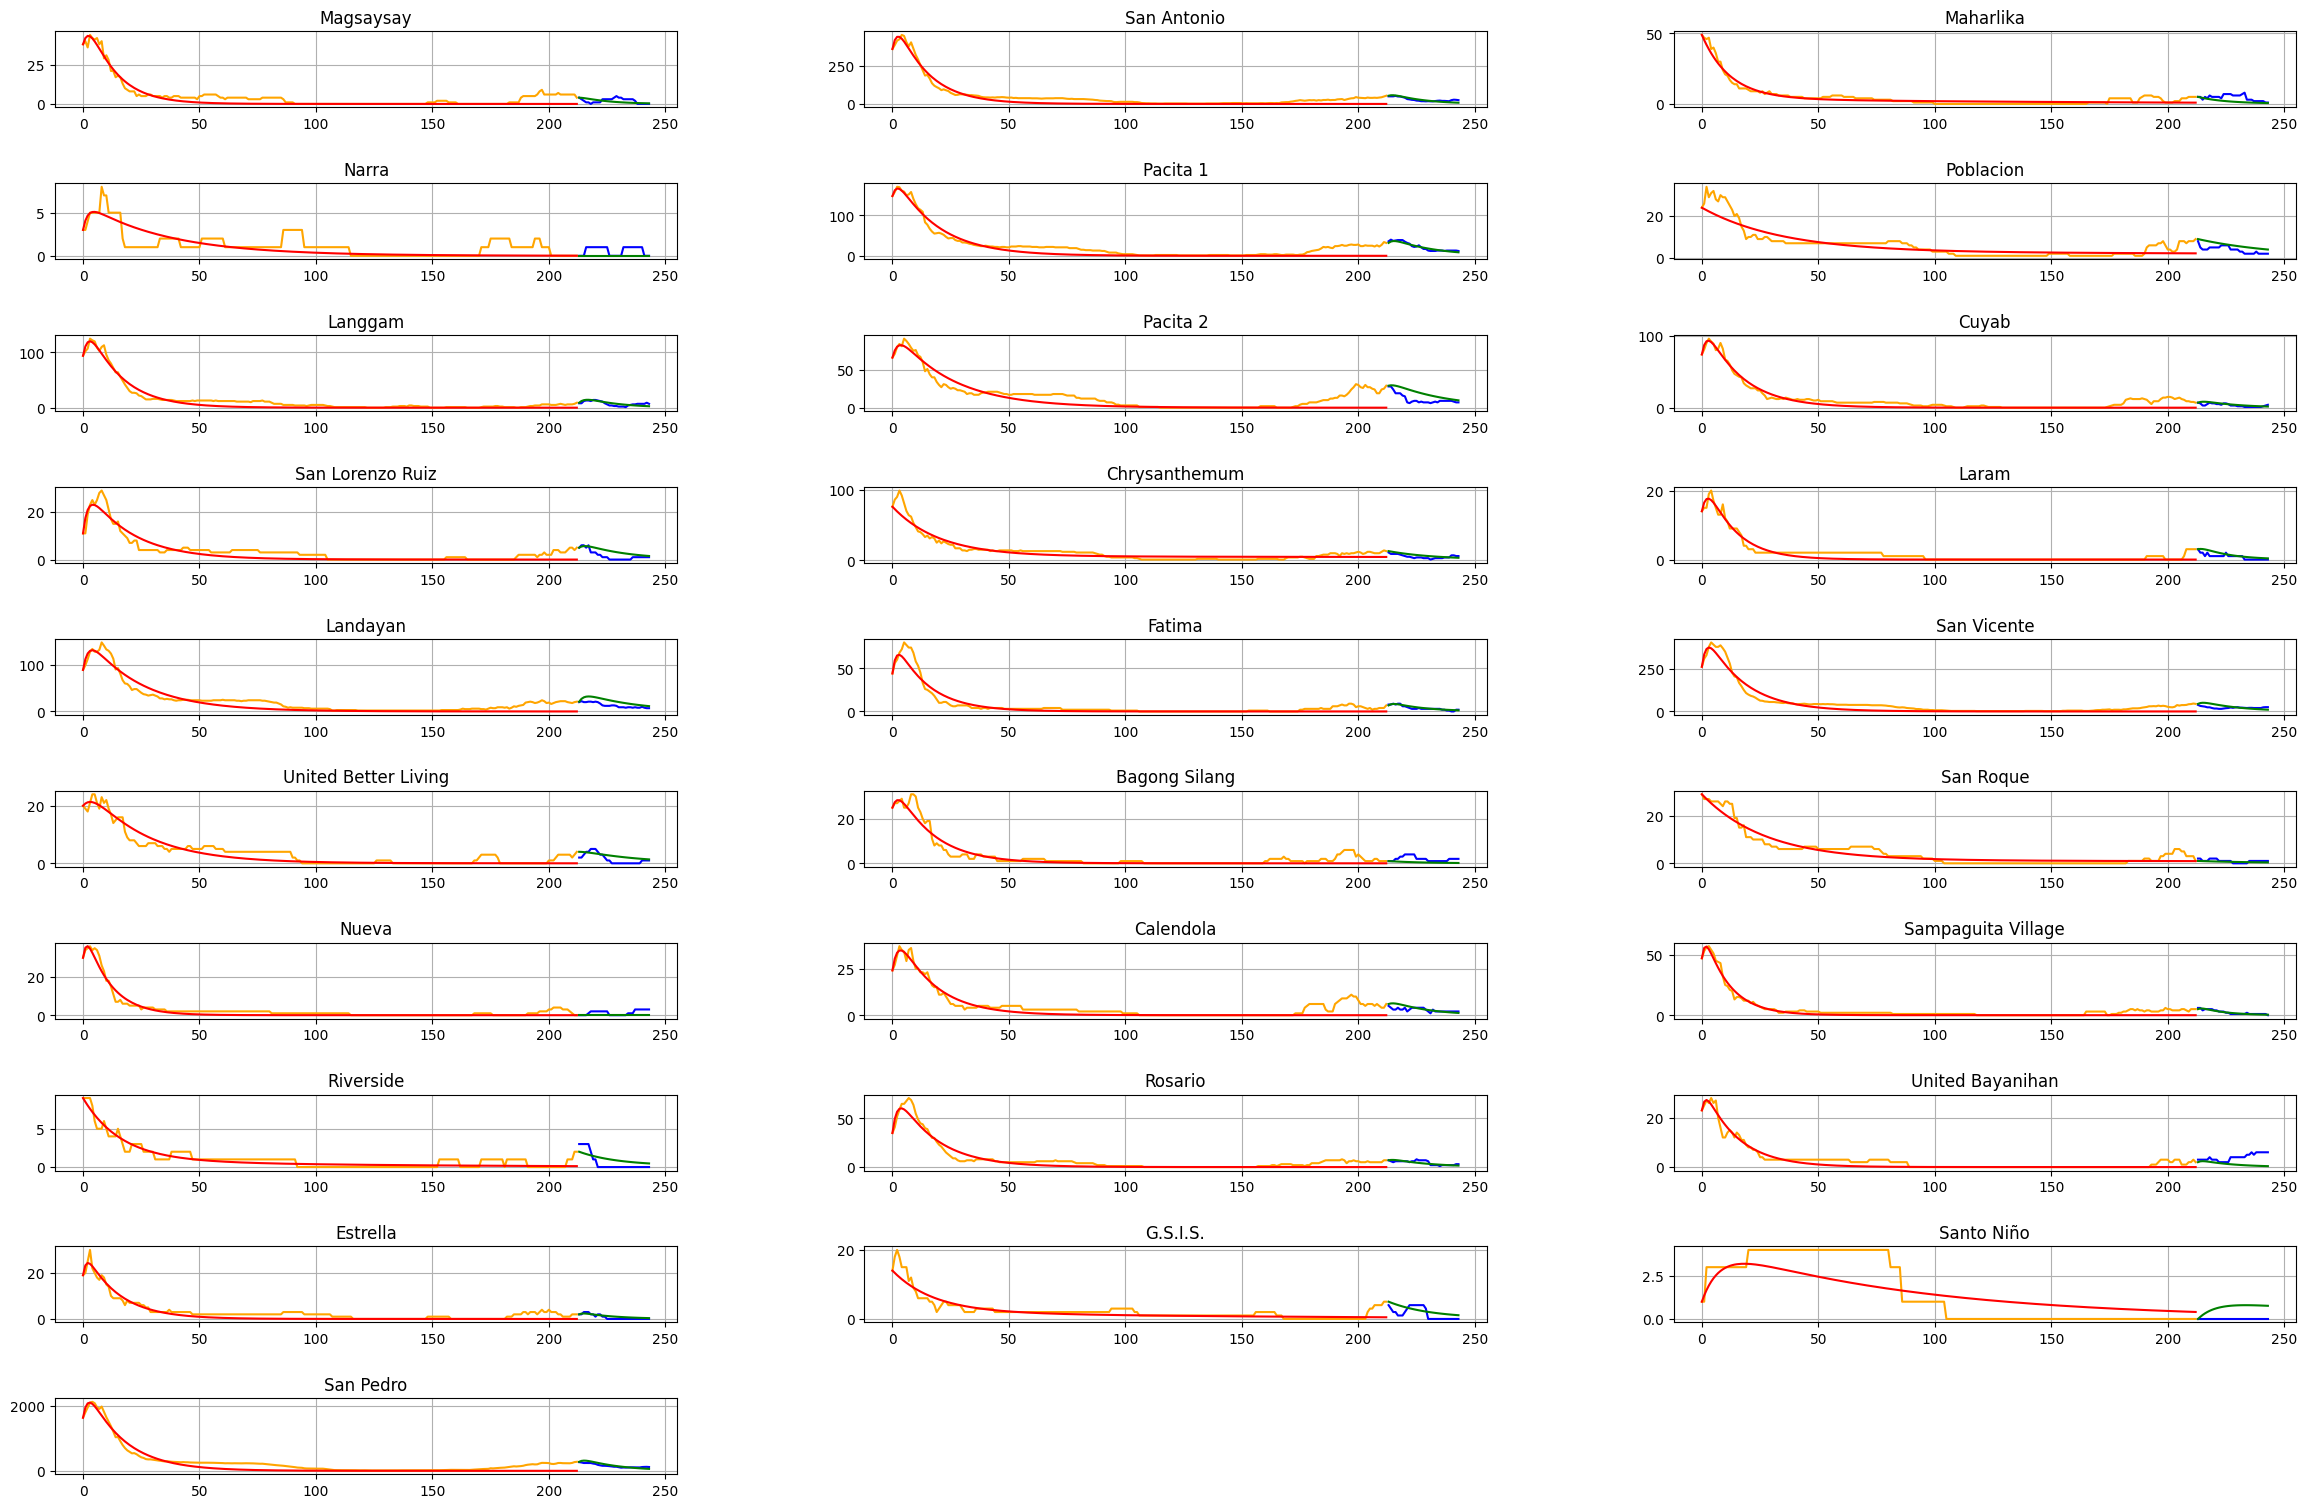

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import dual_annealing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from datetime import timedelta

df = pd.read_csv("combined_san_pedro_actual_cases.csv", parse_dates=["date"])
barangays = df['barangay_Res'].unique()

metrics_dataset = []
hyperparameter_dataset = []
final_dataset = []
populations = pd.read_csv("C:\\Users\\jhnbr\\Documents\\Github\\SEIR_DJANGO-WebTest\\transformation\\dataset\\SanPedroBarangayPopulation-csv.csv")

# Create a figure for combined subplots
num_barangays = len(barangays)
fig, axes = plt.subplots(nrows=(num_barangays + 2) // 3, ncols=3, figsize=(24, 16))
axes = axes.flatten()

# SEIR Model Definition
def seir(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / population
    dEdt = beta * S * I / population - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

def objective_function(params, train_data):
    beta, sigma, gamma = params
    initial_conditions = [S, E, I, R]
    t = np.arange(len(train_data))
    
    # Solve SEIR Model
    solution = odeint(seir, initial_conditions, t, args=(beta, sigma, gamma))
    I_pred = solution[:, 2]  # Predicted Infected
    I_pred = np.clip(I_pred, 0, None)  # Ensure non-negative predictions

    # Calculate Error
    I_actual = train_data['count_Infectious'].values
    error = np.mean((I_pred - I_actual) ** 2)
    
    # Regularization term to prevent extreme parameter values
    reg_term = 0.01 * (beta ** 2 + sigma ** 2 + gamma ** 2)
    
    return error + reg_term

bounds = [(0.0001, 1.0), (0.0001, 1.0), (0.0001, 1.0)]  # Wider bounds
hyperparameter_dataset = []
for i, barangay in enumerate(barangays): # loop nung each figure na ilalagay 
    print(barangay)
    population_2022 = populations.loc[populations['barangay_Res'] == barangay.upper(), 'Population'].values[0] 
    train_data = df[ (df['date'] >= '2022-01-13') & (df['date'] <= '2022-08-13') &  (df['barangay_Res'] == barangay)]
    test_data = df[ (df['date'] >= '2022-08-14') & (df['date'] <= '2022-09-13') &  (df['barangay_Res'] == barangay)]


    train_cases = train_data['count_Infectious'].values
    test_cases = test_data['count_Infectious'].values

    E = train_data['count_Exposed'].values[0]
    I = train_data['count_Infectious'].values[0]
    R = train_data['count_Recovered'].values[0]
    S = population_2022 - E - I - R
    initial_conditions = [S, E, I, R]


    e_test = train_data['count_Exposed'].values[-1]
    i_test = train_data['count_Infectious'].values[-1]
    r_test = train_data['count_Recovered'].values[-1]
    s_test = population_2022 - e_test - i_test - r_test
    initial_conditions_test = [s_test, e_test,i_test, r_test]
   
    # result = dual_annealing(objective_function, bounds, args=(train_data, initial_conditions))
    result = dual_annealing(objective_function, bounds, args=(train_data,))
    beta, sigma, gamma = result.x
    print(f'barangay : {barangay}, beta: {beta}, sigma:{sigma}, gamma:{gamma}')

    t_train = np.arange(len(train_data))
    t_test = np.arange(len(train_data), len(train_data) + len(test_data) )

    print(f"beta: {beta}, sigma: {sigma}, gamma: {gamma}")

    hyperparameters = pd.DataFrame({
    "barangay_Res": [barangay],
    "beta": [beta],
    "gamma": [gamma],
    "sigma": [sigma]
    })
    hyperparameter_dataset.append(hyperparameters)
    # train_solution = odeint(seir_model, initial_conditions, t_train, args=(beta, sigma, gamma))
    # test_initial_conditions = train_solution[-1]  # Start future prediction from the last training state
    # test_solution = odeint(seir_model, test_initial_conditions, t_test, args=(beta, sigma, gamma))
    initial_conditions_test = [s_test, e_test,i_test, r_test]

    predicted_solution = odeint(seir, initial_conditions_test, t_test, args=(beta, sigma, gamma))
    I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
    I_pred_train = np.clip(odeint(seir, initial_conditions, t_train, args=(beta, sigma, gamma))[:, 2], 0, None)


    mae_test = mean_absolute_error(I_pred_test, test_cases )
    norm_factor = np.mean(np.abs(test_cases))
    nmae_test = mae_test / norm_factor
    mse_test = mean_squared_error(I_pred_test, test_cases)
    rmse_test = np.sqrt(mse_test)
    metrics = pd.DataFrame({
    "barangay_Res": [barangay],
    "mae": [mae_test],
    "nmae":[ nmae_test],
    "mse":[mse_test],
    "rmse": [rmse_test]
    })
    metrics_dataset.append(metrics)
    print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")
    n_days = len(train_data)
    n_pred_days = len(test_data)
    t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
    ts = np.linspace(0, n_days - 1, n_days )
    # i_test = test_data['count_Infectious'].values[0]
    # r_test = test_data['count_Recovered'].values[0]

    # s_test = population_2022 - E - I
    # result = dual_annealing(objective_function, bounds, args=(train_data,))
    # optimal_params = result.x

    # # Predict on Test Data
    # initial_conditions_test = [s_test, e_test,i_test, r_test]
    # t_test = np.arange(len(test_data))
    # predicted_solution = odeint(seir_model, initial_conditions_test, t_test, args=tuple(optimal_params))
    # I_pred_test = predicted_solution[:, 2]
    train_date = pd.to_datetime(train_data['date'].values)
    observed_dates = train_date
    future_dates = [train_date[-1] + timedelta(days=i) for i in range(1,len(test_data)+1)]
    
    # Combine observed and future predictions
    combined_dates = list(observed_dates) + future_dates
    combined_predictions = list(I_pred_train) + list(I_pred_test)
    combined_actual = list(train_cases) + list(test_cases)
    print(len(combined_predictions))
    print(len(combined_dates))
    print(len(combined_actual))
    count_prediction = pd.DataFrame({
        "barangay_Res": [barangay] * len(combined_dates),
        "date": combined_dates,
        "prediction": combined_predictions,
        "actual":combined_actual
    })
    final_dataset.append(count_prediction)



    axes[i].plot(ts,train_cases, label='Actual Infected (Train)', color='orange') #papalitan kung ano yung actual plots
    axes[i].plot(ts,I_pred_train, label='Predicted Infected (Train)', color='red') #papalitan kung ano yung actual plots
    axes[i].plot(t,test_cases, label='Actual Infected (Test)', color='blue') #papalitan kung ano yung actual plots
    axes[i].plot(t, I_pred_test , label='Predicted Infected (Test)', color='green') #papalitan kung ano yung actual plots
    axes[i].set_title(f'{barangay}') #title nung isang graph
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

final_df = pd.concat(final_dataset, ignore_index=True)
final_df.to_csv("result_annealing_prediction.csv", index=False)

final_hyperparameter = pd.concat(hyperparameter_dataset,ignore_index=True)
final_hyperparameter.to_csv("result_annealing_hyperparameters.csv", index=False)

final_validation = pd.concat(metrics_dataset,ignore_index=True)
final_validation.to_csv("result_annealing_validation.csv", index=False)


fig.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=1, wspace=0.3)  # Adjust vertical and horizontal spacing
plt.show()

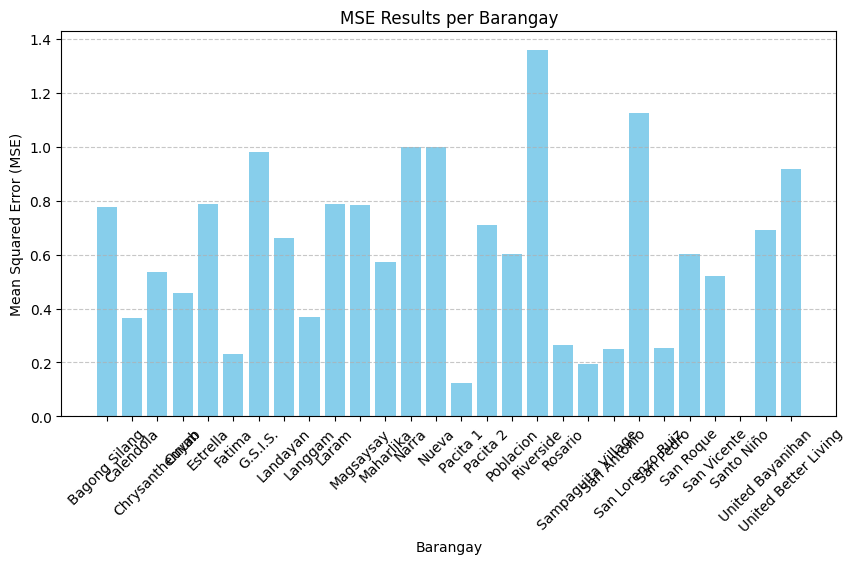

# SEIR all barangays validation and hyperparameters

Magsaysay
MAE : 1.5006248554311825, NMAE: 0.726865164349479, MSE: 3.9124243293220355, RMSE: 1.9779849163535186
244
244
244
San Antonio
MAE : 17.87925315192702, NMAE: 0.6199741025835991, MSE: 404.8563928664543, RMSE: 20.12104353323789
244
244
244
Maharlika
MAE : 2.028742329242875, NMAE: 0.4492215157609223, MSE: 5.2827449266940985, RMSE: 2.298422269012833
244
244
244
Narra
MAE : 0.6129032258064516, NMAE: 1.0, MSE: 0.6129032258064516, RMSE: 0.7828813612588127
244
244
244
Pacita 1
MAE : 13.160654655725603, NMAE: 0.5895668993171874, MSE: 218.25951935497147, RMSE: 14.773608880533269
244
244
244
Poblacion
MAE : 2.2779204535919937, NMAE: 0.5934078492550572, MSE: 7.436557499488602, RMSE: 2.72700522542378
244
244
244
Langgam
MAE : 5.619145690376182, NMAE: 0.7573631147898332, MSE: 38.694191096172595, RMSE: 6.220465504781181
244
244
244
Pacita 2
MAE : 11.088858790036257, NMAE: 0.9906473270637578, MSE: 152.74497196895487, RMSE: 12.359003680271112
244
244
244
Cuyab
MAE : 3.2450305738879996, NMAE: 0.

C:\Users\jhnbr\AppData\Local\Temp\ipykernel_5664\230301633.py:93: RuntimeWarning: divide by zero encountered in scalar divide
  nmae_test = mae_test / norm_factor


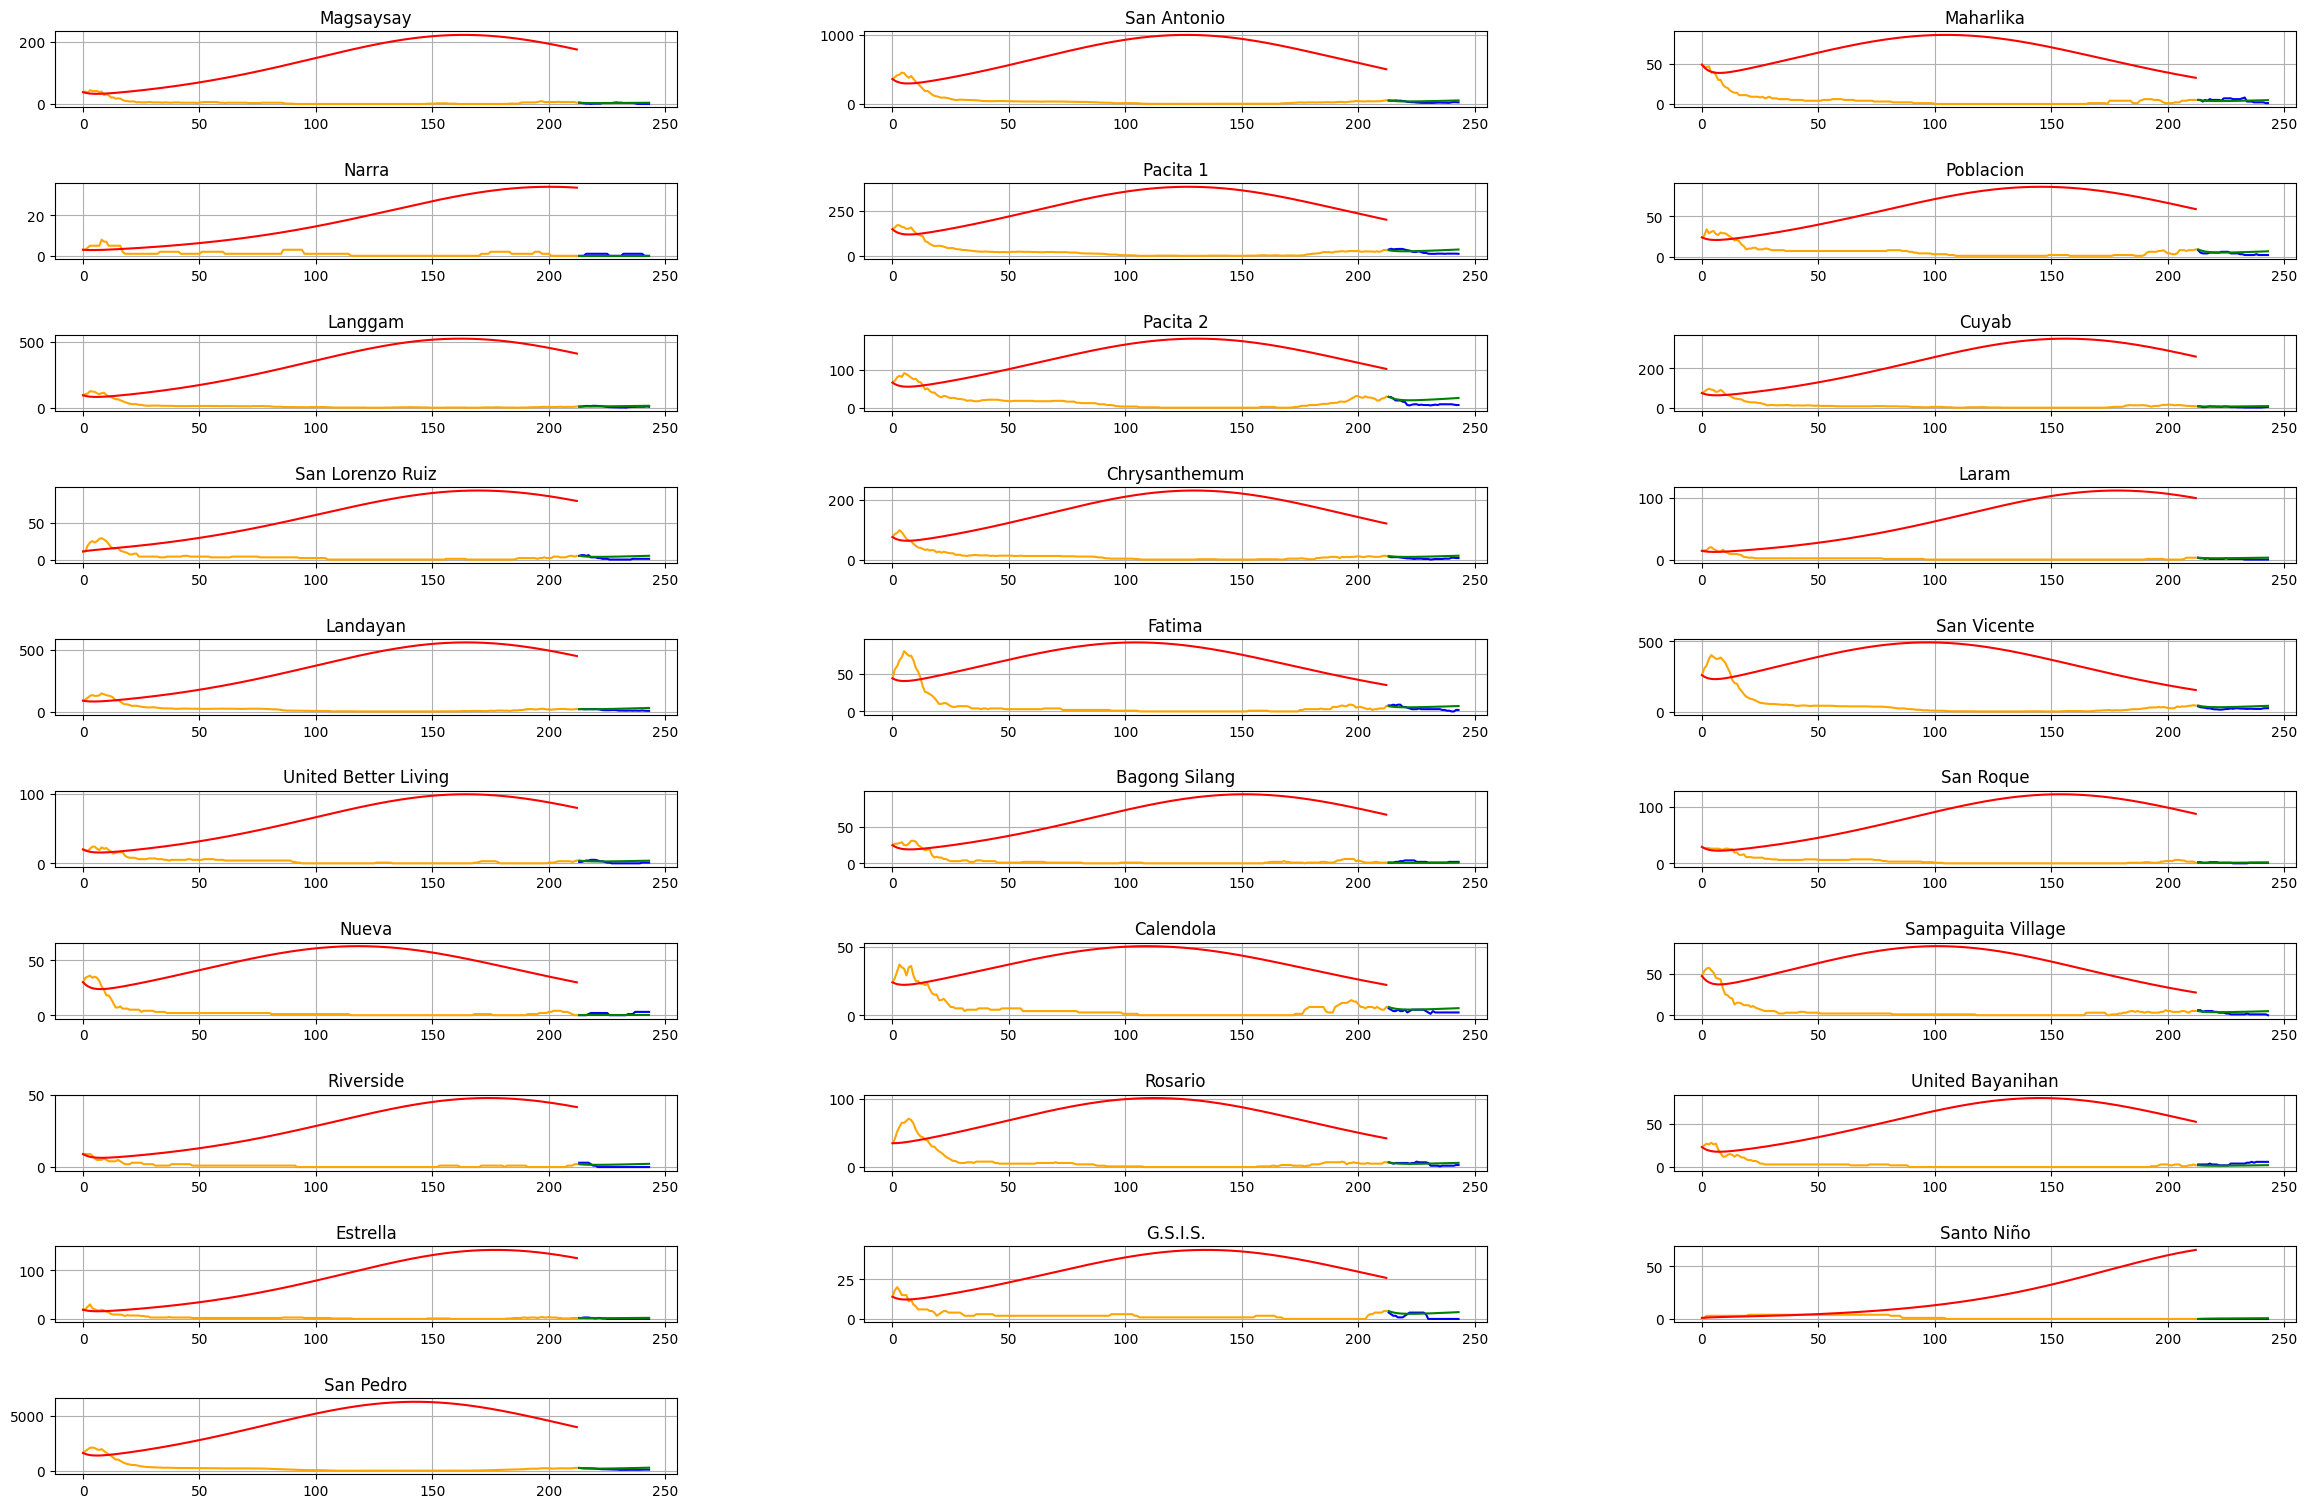

In [50]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
from cmdstanpy import set_cmdstan_path,CmdStanModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.integrate import odeint
import matplotlib.pyplot as plt



df = pd.read_csv("combined_san_pedro_actual_cases.csv", parse_dates=["date"])
barangays = df['barangay_Res'].unique()

metrics_dataset = []
hyperparameter_dataset = []
final_dataset = []
populations = pd.read_csv("C:\\Users\\jhnbr\\Documents\\Github\\SEIR_DJANGO-WebTest\\transformation\\dataset\\SanPedroBarangayPopulation-csv.csv")

# Create a figure for combined subplots
num_barangays = len(barangays)
fig, axes = plt.subplots(nrows=(num_barangays + 2) // 3, ncols=3, figsize=(24, 16))
axes = axes.flatten()


def seir(y, t,  beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / population_2022
    dEdt = beta * S * I / population_2022 - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

beta = 0.2  # Infection rate
sigma = 1/9  # Incubation rate
gamma = 1/6.9  # Recovery rate


for i, barangay in enumerate(barangays): # loop nung each figure na ilalagay 
    print(barangay)
    population_2022 = populations.loc[populations['barangay_Res'] == barangay.upper(), 'Population'].values[0] 
    train_data = df[ (df['date'] >= '2022-01-13') & (df['date'] <= '2022-08-13') &  (df['barangay_Res'] == barangay)]
    test_data = df[ (df['date'] >= '2022-08-14') & (df['date'] <= '2022-09-13') &  (df['barangay_Res'] == barangay)]


    train_cases = train_data['count_Infectious'].values
    test_cases = test_data['count_Infectious'].values
    train_dates = pd.to_datetime(train_data['date'])
    test_dates = pd.to_datetime(test_data['date'])
    n_days = len(train_dates)
    n_pred_days = len(test_data)


    E = train_data['count_Exposed'].values[0]
    I = train_data['count_Infectious'].values[0]
    R = train_data['count_Recovered'].values[0]
    S = population_2022 - E - I - R
    initial_conditions = [S, E, I, R]


    e_test = train_data['count_Exposed'].values[-1]
    i_test = train_data['count_Infectious'].values[-1]
    r_test = train_data['count_Recovered'].values[-1]
    s_test = population_2022 - e_test - i_test - r_test
    initial_conditions_test = [s_test, e_test,i_test, r_test]



    t_train = np.arange(len(train_data))
    t_test = np.arange(len(train_data), len(train_data) + len(test_data) )

    predicted_solution = odeint(seir_ode, initial_conditions_test, t_test, args=(beta, sigma, gamma))
    I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
    I_pred_train = np.clip(odeint(seir_ode, initial_conditions, np.arange(len(train_data)), args=(beta, sigma, gamma))[:, 2], 0, None)


    hyperparameters = pd.DataFrame({
    "barangay_Res": [barangay],
    "beta": [beta],
    "gamma": [gamma],
    "sigma": [sigma]
    })
    hyperparameter_dataset.append(hyperparameters)
    
    initial_conditions_test = [s_test, e_test,i_test, r_test]

    predicted_solution = odeint(seir, initial_conditions_test, t_test, args=(beta, sigma, gamma))
    I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
    I_pred_train = np.clip(odeint(seir, initial_conditions, t_train, args=(beta, sigma, gamma))[:, 2], 0, None)


    mae_test = mean_absolute_error(I_pred_test, test_cases )
    norm_factor = np.mean(np.abs(test_cases))
    nmae_test = mae_test / norm_factor
    mse_test = mean_squared_error(I_pred_test, test_cases)
    rmse_test = np.sqrt(mse_test)
    metrics = pd.DataFrame({
    "barangay_Res": [barangay],
    "mae": [mae_test],
    "nmae":[ nmae_test],
    "mse":[mse_test],
    "rmse": [rmse_test]
    })
    metrics_dataset.append(metrics)
    print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")
    n_days = len(train_data)
    n_pred_days = len(test_data)


    t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
    ts = np.linspace(0, n_days - 1, n_days )

    train_date = pd.to_datetime(train_data['date'].values)
    observed_dates = train_date
    future_dates = [train_date[-1] + timedelta(days=i) for i in range(1,len(test_data)+1)]
    
    # Combine observed and future predictions
    combined_dates = list(observed_dates) + future_dates
    combined_predictions = list(I_pred_train) + list(I_pred_test)
    combined_actual = list(train_cases) + list(test_cases)
    print(len(combined_predictions))
    print(len(combined_dates))
    print(len(combined_actual))
    count_prediction = pd.DataFrame({
        "barangay_Res": [barangay] * len(combined_dates),
        "date": combined_dates,
        "prediction": combined_predictions,
        "actual":combined_actual
    })
    final_dataset.append(count_prediction)



    axes[i].plot(ts,train_cases, label='Actual Infected (Train)', color='orange') #papalitan kung ano yung actual plots
    axes[i].plot(ts,I_pred_train, label='Predicted Infected (Train)', color='red') #papalitan kung ano yung actual plots
    axes[i].plot(t,test_cases, label='Actual Infected (Test)', color='blue') #papalitan kung ano yung actual plots
    axes[i].plot(t, I_pred_test , label='Predicted Infected (Test)', color='green') #papalitan kung ano yung actual plots
    axes[i].set_title(f'{barangay}') #title nung isang graph
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

final_df = pd.concat(final_dataset, ignore_index=True)
final_df.to_csv("result_seir_prediction.csv", index=False)

final_hyperparameter = pd.concat(hyperparameter_dataset,ignore_index=True)
final_hyperparameter.to_csv("result_seir_hyperparameters.csv", index=False)

final_validation = pd.concat(metrics_dataset,ignore_index=True)
final_validation.to_csv("result_seir_validation.csv", index=False)


fig.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=1, wspace=0.3)  # Adjust vertical and horizontal spacing
plt.show()


# Bayesian Iteration 2 all barangays validation and hyperparameters

15:32:58 - cmdstanpy - INFO - CmdStan start processing


Magsaysay


chain 1 |          | 00:00 Status





chain 1 |▊         | 00:07 Status

chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)
chain 1 |██▌       | 00:12 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:19 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████     | 00:21 Iteration: 400 / 1000 [ 40%]  (Warmup)




chain 1 |██████▋   | 00:24 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |████████▎ | 00:28 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:30 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:32 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:38 Sampling completed                      
chain 2 |██████████| 00:38 Sampling completed                      
chain 3 |██████████| 00:38 Sampling completed                      
chain 4 |██████████| 00:38 Sampling completed                      


15:33:36 - cmdstanpy - INFO - CmdStan done processing.
15:33:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running

15:33:37 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10798733899999999, gamma: 0.1115409095, sigma: 0.12797742650000002
MAE : 1.5996807260439936, NMAE: 0.7748453516775594, MSE: 3.5282294606802003, RMSE: 1.8783581822113162
244
244
244
San Antonio


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:01 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:06 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:09 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:12 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:14 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:17 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:20 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 00:22 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |█████████▏| 00:25 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:27 Iteration: 900 / 1000 [ 90%]  (Sampling)



chain 1 |██████████| 00:35 Sampling completed                      
chain 2 |██████████| 00:35 Sampling completed                      
chain 3 |██████████| 00:35 Sampling completed                      
chain 4 |██████████| 00:35 Sampling completed                      


15:34:12 - cmdstanpy - INFO - CmdStan done processing.
15:34:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 8 divergent transitions (1.6%)
	Chain 2 had 35 divergent transitions (7.0%)
	Chain 3 had 8 divergent transitions (1.6%)
	Chain 4 had 14 divergent transitions (2.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


15:34:13 - cmdstanpy - INFO - CmdStan start processing


beta: 0.107774858, gamma: 0.1111484135, sigma: 0.127665465
MAE : 6.652434282749716, NMAE: 0.23067725141525858, MSE: 80.65465819811025, RMSE: 8.98079385121996
244
244
244
Maharlika


chain 1 |          | 00:00 Status




chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:17 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:21 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:25 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:28 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:30 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:32 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:33 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:35 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:37 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:42 Sampling completed                      
chain 2 |██████████| 00:42 Sampling completed                      
chain 3 |██████████| 00:42 Sampling completed                      
chain 4 |██████████| 00:42 Sampling completed                      


15:34:55 - cmdstanpy - INFO - CmdStan done processing.
15:34:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:34:56 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 15 divergent transitions (3.0%)
	Chain 2 had 7 divergent transitions (1.4%)
	Chain 3 had 6 divergent transitions (1.2%)
	Chain 4 had 17 divergent transitions (3.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


15:34:56 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1067699145, gamma: 0.11017517799999998, sigma: 0.12911507749999998
MAE : 2.5834526476082074, NMAE: 0.5720502291132459, MSE: 10.215070087625628, RMSE: 3.1961023274647555
244
244
244
Narra


chain 1 |          | 00:00 Status




chain 1 |▊         | 00:07 Status
chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)

chain 1 |██▌       | 00:14 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:18 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |█████     | 00:22 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:24 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 00:26 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 00:28 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 00:29 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:30 Iteration: 900 / 1000 [ 90%]  (Sampling)













chain 1 |██████████| 00:39 Sampling completed                      
chain 2 |██████████| 00:39 Sampling completed                      
chain 3 |██████████| 00:39 Sampling completed                      
chain 4 |██████████| 00:39 Sampling completed                      


15:35:36 - cmdstanpy - INFO - CmdStan done processing.
15:35:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integra

15:35:36 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1064453735, gamma: 0.10977625749999999, sigma: 0.12957281699999998
MAE : 0.6129032258064516, NMAE: 1.0, MSE: 0.6129032258064516, RMSE: 0.7828813612588127
244
244
244
Pacita 1


chain 1 |          | 00:00 Status










chain 1 |▊         | 00:16 Status
chain 1 |█▋        | 00:20 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:24 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:27 Iteration: 200 / 1000 [ 20%]  (Warmup)
chain 1 |████▏     | 00:29 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 00:33 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 00:36 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:39 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:42 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |█████████▏| 00:44 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:47 Sampling completed                      
chain 2 |██████████| 00:47 Sampling completed                      
chain 3 |██████████| 00:47 Sampling completed                      
chain 4 |██████████| 00:47 Sampling completed                      


15:36:24 - cmdstanpy - INFO - CmdStan done processing.
15:36:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


15:36:24 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 10 divergent transitions (2.0%)
	Chain 2 had 12 divergent transitions (2.4%)
	Chain 3 had 17 divergent transitions (3.4%)
	Chain 4 had 3 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:36:25 - cmdstanpy - INFO - CmdStan start processing


beta: 0.107740218, gamma: 0.1112887075, sigma: 0.12628106149999999
MAE : 7.231285946707823, NMAE: 0.32394489067621746, MSE: 63.60064933831224, RMSE: 7.975001525912847
244
244
244
Poblacion


chain 1 |          | 00:00 Status





chain 1 |▊         | 00:13 Status
chain 1 |█▋        | 00:14 Iteration:   1 / 1000 [  0%]  (Warmup)









chain 1 |██▌       | 00:25 Iteration: 100 / 1000 [ 10%]  (Warmup)







chain 1 |███▎      | 00:34 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:37 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 00:41 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:44 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |██████████| 00:55 Sampling completed                      
chain 2 |██████████| 00:55 Sampling completed                      
chain 3 |██████████| 00:55 Sampling completed                      
chain 4 |██████████| 00:55 Sampling completed                      


15:37:21 - cmdstanpy - INFO - CmdStan done processing.
15:37:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 

15:37:21 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1072527775, gamma: 0.1107412875, sigma: 0.129153373
MAE : 1.8887711509517915, NMAE: 0.49203282083618094, MSE: 4.38796128617087, RMSE: 2.094746114967365
244
244
244
Langgam


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:05 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:09 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:15 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:18 Iteration: 300 / 1000 [ 30%]  (Warmup)
chain 1 |█████     | 00:22 Iteration: 400 / 1000 [ 40%]  (Warmup)




chain 1 |██████▋   | 00:26 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:31 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:35 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |█████████▏| 00:40 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:44 Iteration: 900 / 1000 [ 90%]  (Sampling)




chain 1 |██████████| 00:49 Sampling completed                      
chain 2 |██████████| 00:49 Sampling completed                      
chain 3 |██████████| 00:49 Sampling completed                      
chain 4 |██████████| 00:49 Sampling completed                      


15:38:11 - cmdstanpy - INFO - CmdStan done processing.
15:38:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


15:38:11 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 divergent transitions (0.8%)
	Chain 2 had 14 divergent transitions (2.8%)
	Chain 3 had 13 divergent transitions (2.6%)
	Chain 4 had 7 divergent transitions (1.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:38:11 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1074363315, gamma: 0.1109706405, sigma: 0.1254535585
MAE : 3.14868990226971, NMAE: 0.42438863900156965, MSE: 12.344477122959145, RMSE: 3.513470808610646
244
244
244
Pacita 2


chain 1 |          | 00:00 Status





chain 1 |▊         | 00:07 Status

chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)

chain 1 |██▌       | 00:13 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:20 Iteration: 300 / 1000 [ 30%]  (Warmup)





chain 1 |█████     | 00:23 Iteration: 400 / 1000 [ 40%]  (Warmup)






chain 1 |██████▋   | 00:27 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 00:30 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:33 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:36 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 00:40 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:44 Sampling completed                      
chain 2 |██████████| 00:44 Sampling completed                      
chain 3 |██████████| 00:44 Sampling completed                      
chain 4 |██████████| 00:44 Sampling 


15:38:56 - cmdstanpy - INFO - CmdStan done processing.
15:38:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


15:38:56 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 8 divergent transitions (1.6%)
	Chain 2 had 3 divergent transitions (0.6%)
	Chain 3 had 12 divergent transitions (2.4%)
	Chain 4 had 31 divergent transitions (6.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:38:57 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1064696455, gamma: 0.10996414100000002, sigma: 0.128661662
MAE : 3.223113478968306, NMAE: 0.287943855469791, MSE: 15.493729683378135, RMSE: 3.9362075254460525
244
244
244
Cuyab


chain 1 |          | 00:00 Status






chain 1 |▊         | 00:07 Status
chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)


















chain 1 |██▌       | 00:33 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:37 Iteration: 200 / 1000 [ 20%]  (Warmup)
chain 1 |████▏     | 00:39 Iteration: 300 / 1000 [ 30%]  (Warmup)
chain 1 |█████     | 00:42 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:46 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |██████████| 00:59 Sampling completed                      
chain 2 |██████████| 00:59 Sampling completed                      
chain 3 |██████████| 00:59 Sampling completed                      
chain 4 |██████████| 00:59 Sampling completed                      


15:39:57 - cmdstanpy - INFO - CmdStan done processing.
15:39:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:39:57 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (1.0%)
	Chain 2 had 9 divergent transitions (1.8%)
	Chain 3 had 16

15:39:58 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1074149745, gamma: 0.110891761, sigma: 0.126731292
MAE : 0.985543740794715, NMAE: 0.2882250562701525, MSE: 1.9682808525483013, RMSE: 1.4029543301719771
244
244
244
San Lorenzo Ruiz


chain 1 |          | 00:00 Status




chain 1 |▊         | 00:07 Status
chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:12 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 00:20 Iteration: 300 / 1000 [ 30%]  (Warmup)





chain 1 |█████     | 00:24 Iteration: 400 / 1000 [ 40%]  (Warmup)



chain 1 |██████▋   | 00:27 Iteration: 501 / 1000 [ 50%]  (Sampling)




chain 1 |████████▎ | 00:34 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 00:40 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:52 Sampling completed                      
chain 2 |██████████| 00:52 Sampling completed                      
chain 3 |██████████| 00:52 Sampling completed                      
chain 4 |██████████| 00:52 Sampling completed                      


15:40:50 - cmdstanpy - INFO - CmdStan done processing.
15:40:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integra

15:40:51 - cmdstanpy - INFO - CmdStan start processing


beta: 0.108208163, gamma: 0.11189335850000001, sigma: 0.1257211465
MAE : 0.9233843847446263, NMAE: 0.5504791524439118, MSE: 1.161122426137039, RMSE: 1.077553908691829
244
244
244
Chrysanthemum


chain 1 |          | 00:00 Status




chain 1 |▊         | 00:07 Status




chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:19 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:24 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:27 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:30 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:31 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 00:33 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:34 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 00:37 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:42 Sampling completed                      
chain 2 |██████████| 00:42 Sampling completed                      
chain 3 |██████████| 00:42 Sampling completed                      
chain 4 |██████████| 00:42 Sampling completed                      


15:41:34 - cmdstanpy - INFO - CmdStan done processing.
15:41:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:41:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 33 divergent transitions (6.6%)
	Chain 2 had 4 divergent transitions (0.8%)
	Chain 3 had 2

15:41:34 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1080346235, gamma: 0.11142658550000001, sigma: 0.12675088450000002
MAE : 2.162787316308778, NMAE: 0.4216755145004536, MSE: 6.581567836362088, RMSE: 2.5654566525985363
244
244
244
Laram


chain 1 |          | 00:00 Status





chain 1 |▊         | 00:07 Status




chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:16 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:18 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:21 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |██████████| 00:27 Iteration: 900 / 1000 [ 90%]  (Sampling)




chain 1 |██████████| 00:43 Sampling completed                      
chain 2 |██████████| 00:43 Sampling completed                      
chain 3 |██████████| 00:43 Sampling completed                      
chain 4 |██████████| 00:43 Sampling completed                      


15:42:18 - cmdstanpy - INFO - CmdStan done processing.
15:42:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 

15:42:18 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 319 divergent transitions (63.8%)
	Chain 2 had 14 divergent transitions (2.8%)
	Chain 3 had 2 divergent transitions (0.4%)
	Chain 4 had 26 divergent transitions (5.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:42:19 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1165411415, gamma: 0.120376892, sigma: 0.12441940550000001
MAE : 0.4178939669003597, NMAE: 0.498258191304275, MSE: 0.2616999336073093, RMSE: 0.5115661576055528
244
244
244
Landayan


chain 1 |          | 00:00 Status












chain 1 |▊         | 00:13 Status


chain 1 |█▋        | 00:16 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |██▌       | 00:20 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:23 Iteration: 200 / 1000 [ 20%]  (Warmup)






chain 1 |████▏     | 00:26 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |██████████| 00:41 Sampling completed                      
chain 2 |██████████| 00:41 Sampling completed                      
chain 3 |██████████| 00:41 Sampling completed                      
chain 4 |██████████| 00:41 Sampling completed                      


15:43:00 - cmdstanpy - INFO - CmdStan done processing.
15:43:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:43:00 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 6 divergent transitions (1.2%)
	Chain 2 had 10 divergent transitions (2.0%)
	Chain 3 had 130 divergent transitions (26.0%)
	Chain 4 had 10 divergent transitions (2.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


15:43:01 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10804110449999998, gamma: 0.11152487700000001, sigma: 0.1258720325
MAE : 1.7645680236526888, NMAE: 0.1344019870595414, MSE: 4.411126247709801, RMSE: 2.1002681370981664
244
244
244
Fatima


chain 1 |          | 00:00 Status







chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:13 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:20 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████     | 00:24 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:27 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 00:30 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:32 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:34 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:36 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:40 Sampling completed                      
chain 2 |██████████| 00:40 Sampling completed                      
chain 3 |██████████| 00:40 Sampling completed                      
chain 4 |██████████| 00:40 Sampling completed                      


15:43:41 - cmdstanpy - INFO - CmdStan done processing.
15:43:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integra

15:43:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 27 divergent transitions (5.4%)
	Chain 2 had 14 divergent transitions (2.8%)
	Chain 3 had 17 divergent transitions (3.4%)
	Chain 4 had 46 divergent transitions (9.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:43:42 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10808666750000001, gamma: 0.11162937099999999, sigma: 0.1261894495
MAE : 1.073994769914481, NMAE: 0.2729003103881058, MSE: 1.8232156715763268, RMSE: 1.3502650375301608
244
244
244
San Vicente


chain 1 |          | 00:00 Status











chain 1 |█▋        | 00:18 Iteration:   1 / 1000 [  0%]  (Warmup)







chain 1 |██▌       | 00:25 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:28 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:31 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:34 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:37 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:39 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:41 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:43 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:48 Sampling completed                      
chain 2 |██████████| 00:48 Sampling completed                      
chain 3 |██████████| 00:48 Sampling completed                      
chain 4 |██████████| 00:48 Sampling completed                      


15:44:30 - cmdstanpy - INFO - CmdStan done processing.
15:44:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


15:44:31 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 36 divergent transitions (7.2%)
	Chain 2 had 60 divergent transitions (12.0%)
	Chain 3 had 8 divergent transitions (1.6%)
	Chain 4 had 17 divergent transitions (3.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:44:31 - cmdstanpy - INFO - CmdStan start processing


beta: 0.108339391, gamma: 0.11187149049999999, sigma: 0.127014823
MAE : 10.291257775364667, NMAE: 0.4623608565743546, MSE: 125.67819337853992, RMSE: 11.210628589804406
244
244
244
United Better Living


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:13 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:17 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:20 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:23 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 00:27 Iteration: 501 / 1000 [ 50%]  (Sampling)




chain 1 |███████▌  | 00:29 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 00:32 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:35 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:38 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:51 Sampling completed                      
chain 2 |██████████| 00:51 Sampling completed                      
chain 3 |██████████| 00:51 Sampling completed                      
chain 4 |██████████| 00:51 Sampling completed                      


15:45:23 - cmdstanpy - INFO - CmdStan done processing.
15:45:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 

15:45:23 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1078809115, gamma: 0.1111302585, sigma: 0.12963957800000003
MAE : 1.0167476270086289, NMAE: 0.6566495091097395, MSE: 1.468099507724395, RMSE: 1.2116515620112884
244
244
244
Bagong Silang


chain 1 |          | 00:00 Status




chain 1 |█▋        | 00:05 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:11 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:15 Iteration: 200 / 1000 [ 20%]  (Warmup)







chain 1 |████▏     | 00:22 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 00:27 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 00:29 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 00:31 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 00:33 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:35 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:37 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:42 Sampling completed                      
chain 2 |██████████| 00:42 Sampling completed                      
chain 3 |██████████| 00:42 Sampling completed                      
chain 4 |██████████| 00:42 Sampling completed                      


15:46:06 - cmdstanpy - INFO - CmdStan done processing.
15:46:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 

15:46:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 10 divergent transitions (2.0%)
	Chain 2 had 81 divergent transitions (16.2%)
	Chain 3 had 6 divergent transitions (1.2%)
	Chain 4 had 5 divergent transitions (1.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:46:06 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10742159000000001, gamma: 0.110981314, sigma: 0.1286474035
MAE : 1.699860151073399, NMAE: 0.8499300755366995, MSE: 3.9814105781155607, RMSE: 1.9953472324674622
244
244
244
San Roque


chain 1 |          | 00:00 Status



chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)







chain 1 |██▌       | 00:20 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:25 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:27 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:29 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:32 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 00:34 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 00:36 Iteration: 900 / 1000 [ 90%]  (Sampling)







chain 1 |██████████| 00:51 Sampling completed                      
chain 2 |██████████| 00:51 Sampling completed                      
chain 3 |██████████| 00:51 Sampling completed                      
chain 4 |██████████| 00:51 Sampling completed                      


15:46:58 - cmdstanpy - INFO - CmdStan done processing.
15:46:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrat

15:46:58 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10780588299999999, gamma: 0.11128754599999999, sigma: 0.1267975565
MAE : 0.5994501209866478, NMAE: 0.6194317916862028, MSE: 0.4715083986739034, RMSE: 0.6866646915881894
244
244
244
Nueva


chain 1 |          | 00:00 Status



chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)








chain 1 |██▌       | 00:18 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:23 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 00:27 Iteration: 300 / 1000 [ 30%]  (Warmup)





chain 1 |█████     | 00:33 Iteration: 400 / 1000 [ 40%]  (Warmup)




chain 1 |██████▋   | 00:38 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |██████████| 00:53 Sampling completed                      
chain 2 |██████████| 00:53 Sampling completed                      
chain 3 |██████████| 00:53 Sampling completed                      
chain 4 |██████████| 00:53 Sampling completed                      


15:47:52 - cmdstanpy - INFO - CmdStan done processing.
15:47:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrat

15:47:52 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.2%)
	Chain 2 had 4 divergent transitions (0.8%)
	Chain 3 had 18 divergent transitions (3.6%)
	Chain 4 had 7 divergent transitions (1.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:47:53 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1068868825, gamma: 0.110331204, sigma: 0.127541257
MAE : 1.3225806451612903, NMAE: 1.0, MSE: 3.193548387096774, RMSE: 1.7870501915438117
244
244
244
Calendola


chain 1 |          | 00:00 Status



chain 1 |▊         | 00:11 Status


chain 1 |█▋        | 00:12 Iteration:   1 / 1000 [  0%]  (Warmup)









chain 1 |██▌       | 00:24 Iteration: 100 / 1000 [ 10%]  (Warmup)








chain 1 |███▎      | 00:33 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:36 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:40 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:43 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |██████████| 00:53 Sampling completed                      
chain 2 |██████████| 00:53 Sampling completed                      
chain 3 |██████████| 00:53 Sampling completed                      
chain 4 |██████████| 00:53 Sampling completed                      


15:48:47 - cmdstanpy - INFO - CmdStan done processing.
15:48:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 

15:48:47 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 13 divergent transitions (2.6%)
	Chain 2 had 4 divergent transitions (0.8%)
	Chain 3 had 14 divergent transitions (2.8%)
	Chain 4 had 9 divergent transitions (1.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:48:48 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1072527775, gamma: 0.1107412875, sigma: 0.129153373
MAE : 1.2608289026853794, NMAE: 0.439165123407267, MSE: 1.8671924687301682, RMSE: 1.3664525124314304
244
244
244
Sampaguita Village


chain 1 |          | 00:00 Status




chain 1 |▊         | 00:07 Status

chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |██▌       | 00:18 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:21 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:25 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 00:28 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:29 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |██████████| 00:35 Iteration: 900 / 1000 [ 90%]  (Sampling)









chain 1 |██████████| 00:57 Sampling completed                      
chain 2 |██████████| 00:57 Sampling completed                      
chain 3 |██████████| 00:57 Sampling completed                      
chain 4 |██████████| 00:57 Sampling completed                      


15:49:45 - cmdstanpy - INFO - CmdStan done processing.
15:49:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:49:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 30 divergent transitions (6.0%)
	Chain 2 had 31 divergent transitions (6.2%)
	Chain 3 had 25 divergent transitions (5.0%)
	Chain 4 had 6 divergent transitions (1.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


15:49:46 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10858247900000001, gamma: 0.112147984, sigma: 0.125574437
MAE : 0.6081614238516712, NMAE: 0.2547703262081325, MSE: 0.5560486216691779, RMSE: 0.745686677948036
244
244
244
Riverside


chain 1 |          | 00:00 Status






chain 1 |▊         | 00:07 Status


chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:14 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:21 Iteration: 300 / 1000 [ 30%]  (Warmup)





chain 1 |█████     | 00:24 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 00:27 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:31 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |█████████▏| 00:36 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:39 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:40 Sampling completed                      
chain 2 |██████████| 00:40 Sampling completed                      
chain 3 |██████████| 00:40 Sampling completed                      
chain 4 |██████████| 00:40 Sampling completed                      


15:50:26 - cmdstanpy - INFO - CmdStan done processing.
15:50:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integra

15:50:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.6%)
	Chain 2 had 19 divergent transitions (3.8%)
	Chain 3 had 1 divergent transitions (0.2%)
	Chain 4 had 14 divergent transitions (2.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
15:50:27 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10765254850000001, gamma: 0.1112296045, sigma: 0.12671109749999998
MAE : 0.6574931330456041, NMAE: 1.072751953916512, MSE: 0.5668744741969933, RMSE: 0.7529106681386533
244
244
244
Rosario


chain 1 |          | 00:00 Status







chain 1 |█▋        | 00:07 Iteration:   1 / 1000 [  0%]  (Warmup)







chain 1 |██▌       | 00:17 Iteration: 100 / 1000 [ 10%]  (Warmup)





chain 1 |███▎      | 00:23 Iteration: 200 / 1000 [ 20%]  (Warmup)






chain 1 |████▏     | 00:27 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |██████████| 00:46 Sampling completed                      
chain 2 |██████████| 00:46 Sampling completed                      
chain 3 |██████████| 00:46 Sampling completed                      
chain 4 |██████████| 00:46 Sampling completed                      


15:51:13 - cmdstanpy - INFO - CmdStan done processing.
15:51:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running

15:51:14 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10807792299999999, gamma: 0.111669588, sigma: 0.12545910000000002
MAE : 2.015504370668146, NMAE: 0.4462902535050894, MSE: 6.651905180713094, RMSE: 2.5791287638877383
244
244
244
United Bayanihan


chain 1 |          | 00:00 Status























chain 1 |▊         | 00:26 Status


chain 1 |█▋        | 00:29 Iteration:   1 / 1000 [  0%]  (Warmup)






chain 1 |██████████| 01:08 Sampling completed                      
chain 2 |██████████| 01:08 Sampling completed                      
chain 3 |██████████| 01:08 Sampling completed                      
chain 4 |██████████| 01:08 Sampling completed                      


15:52:22 - cmdstanpy - INFO - CmdStan done processing.
15:52:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integra

15:52:23 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10761382699999998, gamma: 0.11121372650000001, sigma: 0.1279389935
MAE : 3.113781145424781, NMAE: 0.7847741098225057, MSE: 13.014079603034657, RMSE: 3.6075032367323883
244
244
244
Estrella


chain 1 |          | 00:00 Status






chain 1 |▊         | 00:07 Status



chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:16 Iteration: 100 / 1000 [ 10%]  (Warmup)








chain 1 |███▎      | 00:21 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:24 Iteration: 300 / 1000 [ 30%]  (Warmup)
chain 1 |█████     | 00:27 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:30 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 00:34 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:37 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:40 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:44 Sampling completed                      
chain 2 |██████████| 00:44 Sampling completed                      
chain 3 |██████████| 00:44 Sampling completed                      
chain 4 |██████████| 00:44 Sampling completed                      


15:53:08 - cmdstanpy - INFO - CmdStan done processing.
15:53:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 

15:53:08 - cmdstanpy - INFO - CmdStan start processing


beta: 0.108737, gamma: 0.1122425695, sigma: 0.127541048
MAE : 0.5167660230901621, NMAE: 0.6674894464914594, MSE: 0.3944064769161075, RMSE: 0.6280178953788718
244
244
244
G.S.I.S.


chain 1 |          | 00:00 Status






chain 1 |▊         | 00:07 Status



chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:14 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:19 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |██████████| 00:24 Iteration: 900 / 1000 [ 90%]  (Sampling)




chain 1 |██████████| 00:37 Sampling completed                      
chain 2 |██████████| 00:37 Sampling completed                      
chain 3 |██████████| 00:37 Sampling completed                      
chain 4 |██████████| 00:37 Sampling completed                      


15:53:46 - cmdstanpy - INFO - CmdStan done processing.
15:53:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 

15:53:47 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1165411415, gamma: 0.120376892, sigma: 0.12441940550000001
MAE : 1.2942339449360487, NMAE: 0.8024250458603502, MSE: 2.4348947556047755, RMSE: 1.5604149305889046
244
244
244
Santo Niño


chain 1 |          | 00:00 Status





chain 1 |██▌       | 00:13 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:16 Iteration: 200 / 1000 [ 20%]  (Warmup)
chain 1 |████▏     | 00:18 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:21 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 00:24 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:26 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 00:29 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 00:32 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 00:34 Iteration: 900 / 1000 [ 90%]  (Sampling)












chain 1 |██████████| 00:45 Sampling completed                      
chain 2 |██████████| 00:45 Sampling completed                      
chain 3 |██████████| 00:45 Sampling completed                      
chain 4 |██████████| 00:45 Sampling completed                      


15:54:33 - cmdstanpy - INFO - CmdStan done processing.
15:54:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] is -inf, but must be finite! (in 'seir_model.stan', line 54, column 2 to column 96)
	Exception: integrate_ode_rk45: initial state[1] i

C:\Users\jhnbr\AppData\Local\Temp\ipykernel_5664\463077462.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  nmae_test = mae_test / norm_factor
15:54:33 - cmdstanpy - INFO - CmdStan start processing


beta: 0.10734137749999999, gamma: 0.11085479300000001, sigma: 0.12683181899999998
MAE : 0.2556746156096369, NMAE: inf, MSE: 0.07633857385268562, RMSE: 0.2762943608774628
244
244
244
San Pedro


chain 1 |          | 00:00 Status










chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:12 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:15 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:17 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:20 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 00:23 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:25 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:28 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 00:32 Sampling completed                      
chain 2 |██████████| 00:32 Sampling completed                      
chain 3 |██████████| 00:32 Sampling completed                      
chain 4 |██████████| 00:32 Sampling completed                      


15:55:06 - cmdstanpy - INFO - CmdStan done processing.
15:55:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_model.stan', line 54, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!
15:55:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 18 divergent transitions (3.6%)
	Chain 2 had 6 divergent transitions (1.2%)
	Chain 3 had 7 divergent transitions (1.4%)
	Chain 4 had 13 divergent transitions (2.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



beta: 0.1072739875, gamma: 0.110418999, sigma: 0.1270158015
MAE : 62.045192378536534, NMAE: 0.4034824761348086, MSE: 5074.456267246454, RMSE: 71.23521788586355
244
244
244


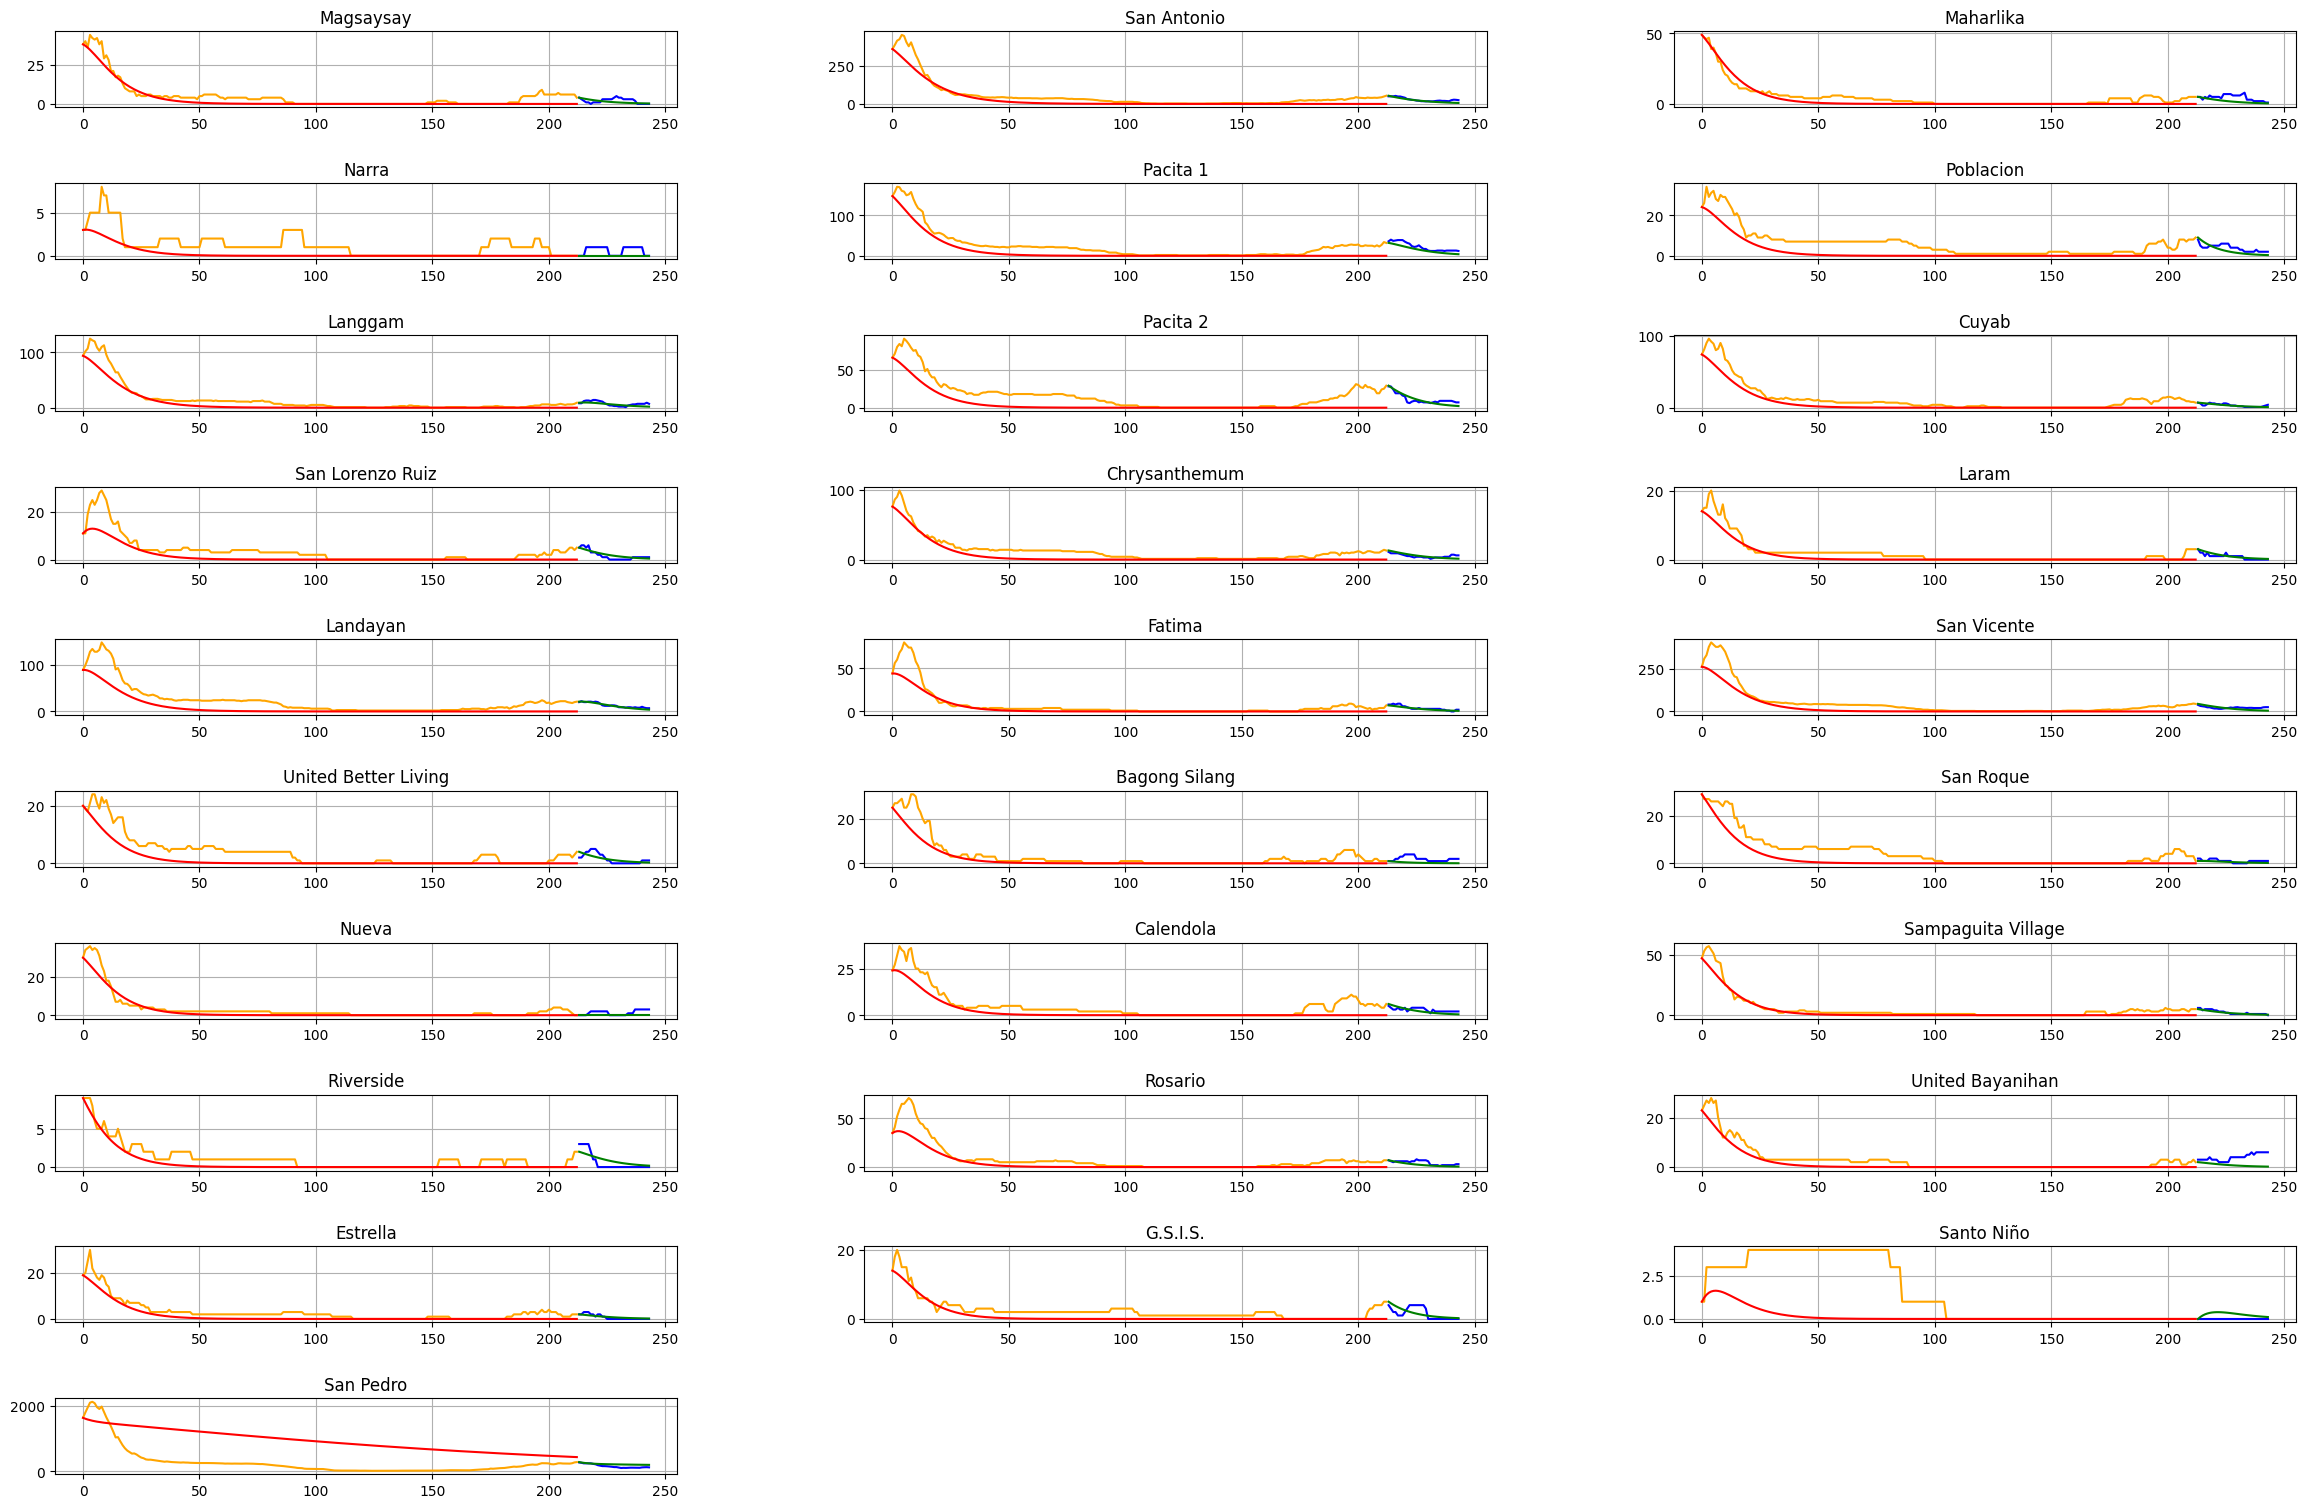

In [38]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
from cmdstanpy import set_cmdstan_path,CmdStanModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.integrate import odeint
import matplotlib.pyplot as plt

cmdstan_path = r'C:\\Users\\jhnbr\\.cmdstan\\cmdstan-2.35.0'
set_cmdstan_path(cmdstan_path)
model = CmdStanModel(stan_file=r'C:\\Users\\jhnbr\\Documents\\Github\SEIR_DJANGO-WebTest\\transformation\dataset\\models\\seir_model.stan')


df = pd.read_csv("combined_san_pedro_actual_cases.csv", parse_dates=["date"])
barangays = df['barangay_Res'].unique()

metrics_dataset = []
hyperparameter_dataset = []
final_dataset = []
populations = pd.read_csv("C:\\Users\\jhnbr\\Documents\\Github\\SEIR_DJANGO-WebTest\\transformation\\dataset\\SanPedroBarangayPopulation-csv.csv")

# Create a figure for combined subplots
num_barangays = len(barangays)
fig, axes = plt.subplots(nrows=(num_barangays + 2) // 3, ncols=3, figsize=(24, 16))
axes = axes.flatten()

def seir_ode(y, t,  beta, sigma, gamma):
    S, E, I, R = y
    dS_dt = -beta * I * S / population
    dE_dt = beta * I * S / population - sigma * E
    dI_dt = sigma * E - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dE_dt, dI_dt, dR_dt]


for i, barangay in enumerate(barangays): # loop nung each figure na ilalagay 
    print(barangay)
    population_2022 = populations.loc[populations['barangay_Res'] == barangay.upper(), 'Population'].values[0] 
    train_data = df[ (df['date'] >= '2022-01-13') & (df['date'] <= '2022-08-13') &  (df['barangay_Res'] == barangay)]
    test_data = df[ (df['date'] >= '2022-08-14') & (df['date'] <= '2022-09-13') &  (df['barangay_Res'] == barangay)]


    train_cases = train_data['count_Infectious'].values
    test_cases = test_data['count_Infectious'].values
    train_dates = pd.to_datetime(train_data['date'])
    test_dates = pd.to_datetime(test_data['date'])
    n_days = len(train_dates)
    n_pred_days = len(test_data)

    stan_data = {
    "n_days": n_days,
    "t0": 0,
    "ts": np.arange(1, n_days + 1),
    "N": int(population),
    "cases": cases.tolist(),
    "i0": train_data['count_Infectious'].values[0] ,  # Initial infectious individuals
}
    fit = model.sample(data=stan_data, iter_warmup=500, iter_sampling=500, chains=4, parallel_chains=4,adapt_delta=0.9, seed=42)


    E = train_data['count_Exposed'].values[0]
    I = train_data['count_Infectious'].values[0]
    R = train_data['count_Recovered'].values[0]
    S = population_2022 - E - I - R
    initial_conditions = [S, E, I, R]


    e_test = train_data['count_Exposed'].values[-1]
    i_test = train_data['count_Infectious'].values[-1]
    r_test = train_data['count_Recovered'].values[-1]
    s_test = population_2022 - e_test - i_test - r_test
    initial_conditions_test = [s_test, e_test,i_test, r_test]
   
    lambda_ = np.mean(fit.stan_variable("infectious_rate"))
    sigma = np.mean(fit.stan_variable("incubation_rate"))
    gamma = np.mean(fit.stan_variable("recovery_rate"))
    beta = lambda_
    gamma = gamma
    print(f'beta: {beta}, gamma: {gamma}, sigma: {sigma}')

    t_train = np.arange(len(train_data))
    t_test = np.arange(len(train_data), len(train_data) + len(test_data) )

    predicted_solution = odeint(seir_ode, initial_conditions_test, t_test, args=(beta, sigma, gamma))
    I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
    I_pred_train = np.clip(odeint(seir_ode, initial_conditions, np.arange(len(train_data)), args=(beta, sigma, gamma))[:, 2], 0, None)


    hyperparameters = pd.DataFrame({
    "barangay_Res": [barangay],
    "beta": [beta],
    "gamma": [gamma],
    "sigma": [sigma]
    })
    hyperparameter_dataset.append(hyperparameters)
    # train_solution = odeint(seir_model, initial_conditions, t_train, args=(beta, sigma, gamma))
    # test_initial_conditions = train_solution[-1]  # Start future prediction from the last training state
    # test_solution = odeint(seir_model, test_initial_conditions, t_test, args=(beta, sigma, gamma))
    initial_conditions_test = [s_test, e_test,i_test, r_test]

    predicted_solution = odeint(seir, initial_conditions_test, t_test, args=(beta, sigma, gamma))
    I_pred_test = np.clip(predicted_solution[:, 2], 0, None)
    I_pred_train = np.clip(odeint(seir, initial_conditions, t_train, args=(beta, sigma, gamma))[:, 2], 0, None)


    mae_test = mean_absolute_error(I_pred_test, test_cases )
    norm_factor = np.mean(np.abs(test_cases))
    nmae_test = mae_test / norm_factor
    mse_test = mean_squared_error(I_pred_test, test_cases)
    rmse_test = np.sqrt(mse_test)
    metrics = pd.DataFrame({
    "barangay_Res": [barangay],
    "mae": [mae_test],
    "nmae":[ nmae_test],
    "mse":[mse_test],
    "rmse": [rmse_test]
    })
    metrics_dataset.append(metrics)
    print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")
    n_days = len(train_data)
    n_pred_days = len(test_data)


    t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
    ts = np.linspace(0, n_days - 1, n_days )

    train_date = pd.to_datetime(train_data['date'].values)
    observed_dates = train_date
    future_dates = [train_date[-1] + timedelta(days=i) for i in range(1,len(test_data)+1)]
    
    # Combine observed and future predictions
    combined_dates = list(observed_dates) + future_dates
    combined_predictions = list(I_pred_train) + list(I_pred_test)
    combined_actual = list(train_cases) + list(test_cases)
    print(len(combined_predictions))
    print(len(combined_dates))
    print(len(combined_actual))
    count_prediction = pd.DataFrame({
        "barangay_Res": [barangay] * len(combined_dates),
        "date": combined_dates,
        "prediction": combined_predictions,
        "actual":combined_actual
    })
    final_dataset.append(count_prediction)



    axes[i].plot(ts,train_cases, label='Actual Infected (Train)', color='orange') #papalitan kung ano yung actual plots
    axes[i].plot(ts,I_pred_train, label='Predicted Infected (Train)', color='red') #papalitan kung ano yung actual plots
    axes[i].plot(t,test_cases, label='Actual Infected (Test)', color='blue') #papalitan kung ano yung actual plots
    axes[i].plot(t, I_pred_test , label='Predicted Infected (Test)', color='green') #papalitan kung ano yung actual plots
    axes[i].set_title(f'{barangay}') #title nung isang graph
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

final_df = pd.concat(final_dataset, ignore_index=True)
final_df.to_csv("result_bayesian_prediction.csv", index=False)

final_hyperparameter = pd.concat(hyperparameter_dataset,ignore_index=True)
final_hyperparameter.to_csv("result_bayesian_hyperparameters.csv", index=False)

final_validation = pd.concat(metrics_dataset,ignore_index=True)
final_validation.to_csv("result_bayesian_validation.csv", index=False)


fig.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=1, wspace=0.3)  # Adjust vertical and horizontal spacing
plt.show()

# Bayesian Iteration 2all barangays validation

19:42:42 - cmdstanpy - INFO - CmdStan start processing


Magsaysay


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |██▌       | 00:35 Iteration: 100 / 1000 [ 10%]  (Warmup)





chain 1 |███▎      | 01:05 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 01:21 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:38 Iteration: 500 / 1000 [ 50%]  (Warmup)




chain 1 |██████▋   | 01:57 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 02:16 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 02:32 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 03:13 Sampling completed                      
chain 2 |██████████| 03:13 Sampling completed                      
chain 3 |██████████| 03:13 Sampling completed                      
chain 4 |██████████| 03:13 Sampling completed                      


19:45:55 - cmdstanpy - INFO - CmdStan done processing.
19:45:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


19:45:56 - cmdstanpy - INFO - CmdStan start processing


beta: 0.30898942149999997, gamma: 0.33842157399999995, sigma: 0.14466210300000001
MAE : 1.5065645161290322, NMAE: 0.7297421875, MSE: 3.298097911290323, RMSE: 1.816066604310074
244
244
244
San Antonio


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:21 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:28 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:33 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:37 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:45 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:49 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |████████▎ | 00:55 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 00:58 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 01:01 Iteration: 900 / 1000 [ 90%]  (Sampling)



chain 1 |██████████| 01:16 Sampling completed                      
chain 2 |██████████| 01:16 Sampling completed                      
chain 3 |██████████| 01:16 Sampling completed                      
chain 4 |██████████| 01:16 Sampling completed                      


19:47:13 - cmdstanpy - INFO - CmdStan done processing.
19:47:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


19:47:13 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 14 divergent transitions (2.8%)
	Chain 2 had 6 divergent transitions (1.2%)
	Chain 3 had 4 divergent transitions (0.8%)
	Chain 4 had 6 divergent transitions (1.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
19:47:15 - cmdstanpy - INFO - CmdStan start processing


beta: 0.11102504200000002, gamma: 0.12320791700000001, sigma: 0.19753057300000001
MAE : 19.32382258064516, NMAE: 0.6700654362416106, MSE: 504.26243312096767, RMSE: 22.45578841013977
244
244
244
Maharlika


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)

chain 1 |██▌       | 00:17 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:36 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:52 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 01:06 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 01:15 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 01:26 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 01:35 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |█████████▏| 01:46 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 01:58 Iteration: 900 / 1000 [ 90%]  (Sampling)














chain 1 |██████████| 04:42 Sampling completed                      
chain 2 |██████████| 04:42 Sampling completed                      
chain 3 |██████████| 04:42 Sampling completed                      
chain 4 |██████████| 04:42 Sampling completed                      


19:51:57 - cmdstanpy - INFO - CmdStan done processing.
19:51:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


19:51:58 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 53 iterations at max treedepth (10.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
19:51:59 - cmdstanpy - INFO - CmdStan start processing


beta: 0.3086366855, gamma: 0.34598437949999994, sigma: 0.1478774955
MAE : 3.780709677419355, NMAE: 0.8371571428571428, MSE: 18.07853248387097, RMSE: 4.251885756211116
244
244
244
Narra


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:14 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:43 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:58 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:09 Iteration: 500 / 1000 [ 50%]  (Warmup)

chain 1 |███████▌  | 01:32 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 01:44 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 01:56 Iteration: 800 / 1000 [ 80%]  (Sampling)



chain 1 |██████████| 02:08 Iteration: 900 / 1000 [ 90%]  (Sampling)








chain 1 |██████████| 03:19 Sampling completed                      
chain 2 |██████████| 03:19 Sampling completed                      
chain 3 |██████████| 03:19 Sampling completed                      
chain 4 |██████████| 03:19 Sampling completed                      


19:55:18 - cmdstanpy - INFO - CmdStan done processing.
19:55:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


19:55:20 - cmdstanpy - INFO - CmdStan start processing


beta: 0.28511175299999997, gamma: 0.31697019350000005, sigma: 0.1589166665
MAE : 0.5631451612903225, NMAE: 0.9188157894736841, MSE: 0.3997840241935484, RMSE: 0.6322847651126416
244
244
244
Pacita 1


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:26 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:39 Iteration: 200 / 1000 [ 20%]  (Warmup)
chain 1 |█████▊    | 01:04 Iteration: 500 / 1000 [ 50%]  (Warmup)


chain 1 |██████▋   | 01:20 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 01:36 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 01:54 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |█████████▏| 02:11 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 02:29 Iteration: 900 / 1000 [ 90%]  (Sampling)









chain 1 |██████████| 03:46 Sampling completed                      
chain 2 |██████████| 03:46 Sampling completed                      
chain 3 |██████████| 03:46 Sampling completed                      
chain 4 |██████████| 03:46 Sampling completed                      


19:59:07 - cmdstanpy - INFO - CmdStan done processing.
19:59:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


19:59:07 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 iterations at max treedepth (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
19:59:08 - cmdstanpy - INFO - CmdStan start processing


beta: 0.3197965965, gamma: 0.34568870799999996, sigma: 0.136428013
MAE : 16.247887096774193, NMAE: 0.7278677745664739, MSE: 366.3416376209678, RMSE: 19.140053229313857
244
244
244
Poblacion


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:27 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:41 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:53 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████▊    | 01:28 Iteration: 500 / 1000 [ 50%]  (Warmup)
chain 1 |██████▋   | 02:02 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 02:36 Iteration: 600 / 1000 [ 60%]  (Sampling)




chain 1 |████████▎ | 03:09 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 03:46 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 04:19 Iteration: 900 / 1000 [ 90%]  (Sampling)





chain 1 |██████████| 06:06 Sampling completed                      
chain 2 |██████████| 06:06 Sampling completed                      
chain 3 |██████████| 06:06 Sampling completed                      
chain 4 |██████████| 06:06 Sampling completed                      


20:05:14 - cmdstanpy - INFO - CmdStan done processing.
20:05:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:05:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 17 iterations at max treedepth (3.4%)
	Chain 2 had 3 iterations at max treedepth (0.6%)
	Chain 3 had 1 iterations at max treedepth (0.2%)
	Chain 4 had 96 iterations at max treedepth (19.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:05:16 - cmdstanpy - INFO - CmdStan start processing


beta: 0.303287909, gamma: 0.3369956245, sigma: 0.14081689449999998
MAE : 2.632483870967743, NMAE: 0.6857731092436977, MSE: 9.209421887096775, RMSE: 3.034702932264833
244
244
244
Langgam


chain 1 |          | 00:00 Status




chain 1 |█▋        | 00:23 Iteration:   1 / 1000 [  0%]  (Warmup)
chain 1 |██▌       | 00:50 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 01:16 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 01:51 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████▊    | 02:13 Iteration: 500 / 1000 [ 50%]  (Warmup)


chain 1 |███████▌  | 03:09 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 03:35 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 04:04 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 04:30 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 05:05 Sampling completed                      
chain 2 |██████████| 05:05 Sampling completed                      
chain 3 |██████████| 05:05 Sampling completed                      
chain 4 |██████████| 05:05 Sampling completed                      


20:10:21 - cmdstanpy - INFO - CmdStan done processing.
20:10:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:10:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 iterations at max treedepth (0.4%)
	Chain 2 had 10 divergent transitions (2.0%)
	Chain 3 had 77 iterations at max treedepth (15.4%)
	Chain 4 had 40 iterations at max treedepth (8.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:10:23 - cmdstanpy - INFO - CmdStan start processing


beta: 0.24494399050000001, gamma: 0.2908985925, sigma: 0.18792269099999998
MAE : 6.690887096774192, NMAE: 0.9018152173913042, MSE: 59.603411282258065, RMSE: 7.720324558090681
244
244
244
Pacita 2


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:44 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:54 Iteration: 300 / 1000 [ 30%]  (Warmup)
chain 1 |█████▊    | 01:06 Iteration: 500 / 1000 [ 50%]  (Warmup)


chain 1 |██████▋   | 01:21 Iteration: 501 / 1000 [ 50%]  (Sampling)




chain 1 |███████▌  | 01:36 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 01:51 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 02:07 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 02:21 Iteration: 900 / 1000 [ 90%]  (Sampling)




chain 1 |██████████| 03:11 Sampling completed                      
chain 2 |██████████| 03:11 Sampling completed                      
chain 3 |██████████| 03:11 Sampling completed                      
chain 4 |██████████| 03:11 Sampling completed                      


20:13:34 - cmdstanpy - INFO - CmdStan done processing.


20:13:35 - cmdstanpy - INFO - CmdStan start processing


beta: 0.29083899199999996, gamma: 0.30902962149999996, sigma: 0.1393023475
MAE : 6.1858387096774194, NMAE: 0.5526253602305475, MSE: 74.43196487096778, RMSE: 8.627396181407677
244
244
244
Cuyab


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:25 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:43 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 01:06 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 01:34 Iteration: 300 / 1000 [ 30%]  (Warmup)







chain 1 |█████     | 02:07 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 02:36 Iteration: 501 / 1000 [ 50%]  (Sampling)





chain 1 |███████▌  | 03:07 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |██████████| 04:30 Sampling completed                      
chain 2 |██████████| 04:30 Sampling completed                      
chain 3 |██████████| 04:30 Sampling completed                      
chain 4 |██████████| 04:30 Sampling completed                      


20:18:05 - cmdstanpy - INFO - CmdStan done processing.
20:18:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:18:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 iterations at max treedepth (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:18:07 - cmdstanpy - INFO - CmdStan start processing


beta: 0.30987213100000005, gamma: 0.3388921445, sigma: 0.140745268
MAE : 1.6561129032258062, NMAE: 0.4843349056603773, MSE: 4.2092705403225805, RMSE: 2.0516506867209583
244
244
244
San Lorenzo Ruiz


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:15 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:34 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:54 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 01:08 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████▊    | 01:23 Iteration: 500 / 1000 [ 50%]  (Warmup)


chain 1 |██████▋   | 01:38 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 01:53 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 02:09 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 02:23 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 02:38 Iteration: 900 / 1000 [ 90%]  (Sampling)



chain 1 |██████████| 03:32 Sampling completed                      
chain 2 |██████████| 03:32 Sampling completed                      
chain 3 |██████████| 03:32 Sampling completed                      
chain 4 |██████████| 03:32 Sampling completed                      


20:21:40 - cmdstanpy - INFO - CmdStan done processing.
20:21:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:21:41 - cmdstanpy - INFO - CmdStan start processing


beta: 0.3010049, gamma: 0.34997601450000004, sigma: 0.1474265085
MAE : 1.553048387096774, NMAE: 0.9258557692307691, MSE: 5.4744389596774194, RMSE: 2.339751901308645
244
244
244
Chrysanthemum


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:20 Iteration:   1 / 1000 [  0%]  (Warmup)

chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 01:03 Iteration: 200 / 1000 [ 20%]  (Warmup)











chain 1 |████▏     | 01:34 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 01:45 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 01:53 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 02:00 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |█████████▏| 02:14 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 02:23 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 02:37 Sampling completed                      
chain 2 |██████████| 02:37 Sampling completed                      
chain 3 |██████████| 02:37 Sampling completed                      
chain 4 |██████████| 02:37 Sampling completed                      


20:24:19 - cmdstanpy - INFO - CmdStan done processing.
20:24:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:24:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 6 divergent transitions (1.2%)
	Chain 2 had 1 divergent transitions (0.2%)
	Chain 3 had 1 divergent transitions (0.2%)
	Chain 4 had 1 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:24:20 - cmdstanpy - INFO - CmdStan start processing


beta: 0.147801092, gamma: 0.16400221450000002, sigma: 0.19607168299999997
MAE : 2.7937903225806457, NMAE: 0.5447012578616354, MSE: 12.52446210483871, RMSE: 3.538991679114082
244
244
244
Laram


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:06 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:28 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:39 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:47 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 01:01 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 01:12 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 01:23 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 01:33 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 01:44 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 01:54 Iteration: 900 / 1000 [ 90%]  (Sampling)










chain 1 |██████████| 02:45 Sampling completed                      
chain 2 |██████████| 02:45 Sampling completed                      
chain 3 |██████████| 02:45 Sampling completed                      
chain 4 |██████████| 02:45 Sampling completed                      


20:27:05 - cmdstanpy - INFO - CmdStan done processing.
20:27:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:27:06 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 10 divergent transitions (2.0%)
	Chain 2 had 9 divergent transitions (1.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:27:07 - cmdstanpy - INFO - CmdStan start processing


beta: 0.26465893949999997, gamma: 0.3360588395, sigma: 0.20827245200000002
MAE : 0.827725806451613, NMAE: 0.9869038461538462, MSE: 1.2426552661290324, RMSE: 1.1147444846820425
244
244
244
Landayan


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 01:01 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 01:30 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |██████▋   | 02:05 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 02:18 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 02:32 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |██████████| 02:56 Iteration: 900 / 1000 [ 90%]  (Sampling)





chain 1 |██████████| 04:27 Sampling completed                      
chain 2 |██████████| 04:27 Sampling completed                      
chain 3 |██████████| 04:27 Sampling completed                      
chain 4 |██████████| 04:27 Sampling completed                      


20:31:34 - cmdstanpy - INFO - CmdStan done processing.
20:31:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:31:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 25 iterations at max treedepth (5.0%)
	Chain 3 had 19 divergent transitions (3.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:31:36 - cmdstanpy - INFO - CmdStan start processing


beta: 0.26729508250000006, gamma: 0.2937765925, sigma: 0.15908203599999998
MAE : 8.338451612903226, NMAE: 0.6351154791154792, MSE: 91.99775183870968, RMSE: 9.59154585240094
244
244
244
Fatima


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:10 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:31 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:54 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 01:10 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████▊    | 01:25 Iteration: 500 / 1000 [ 50%]  (Warmup)

chain 1 |██████▋   | 01:39 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 01:54 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 02:10 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 02:26 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 02:41 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 03:01 Sampling completed                      
chain 2 |██████████| 03:01 Sampling completed                      
chain 3 |██████████| 03:01 Sampling completed                      
chain 4 |██████████| 03:01 Sampling completed                      


20:34:37 - cmdstanpy - INFO - CmdStan done processing.
20:34:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:34:39 - cmdstanpy - INFO - CmdStan start processing


beta: 0.3017400215, gamma: 0.3385689975, sigma: 0.1508219895
MAE : 3.098790322580645, NMAE: 0.7873975409836065, MSE: 15.27461321774194, RMSE: 3.9082749670080714
244
244
244
San Vicente


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:16 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:47 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:59 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 01:10 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:44 Iteration: 500 / 1000 [ 50%]  (Warmup)


chain 1 |██████▋   | 02:17 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 02:57 Iteration: 600 / 1000 [ 60%]  (Sampling)



chain 1 |████████▎ | 03:36 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 04:15 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 04:51 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 05:55 Sampling completed                      
chain 2 |██████████| 05:55 Sampling completed                      
chain 3 |██████████| 05:55 Sampling completed                      
chain 4 |██████████| 05:55 Sampling completed                      


20:40:34 - cmdstanpy - INFO - CmdStan done processing.
20:40:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:40:35 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 56 iterations at max treedepth (11.2%)
	Chain 2 had 267 iterations at max treedepth (53.4%)
	Chain 3 had 14 divergent transitions (2.8%)
	Chain 4 had 55 iterations at max treedepth (11.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:40:36 - cmdstanpy - INFO - CmdStan start processing


beta: 0.271119618, gamma: 0.2962995035, sigma: 0.176292997
MAE : 15.156306451612904, NMAE: 0.6809355072463769, MSE: 251.1810285564516, RMSE: 15.8486916985741
244
244
244
United Better Living


chain 1 |          | 00:00 Status



chain 1 |█▋        | 00:16 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:44 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 01:09 Iteration: 200 / 1000 [ 20%]  (Warmup)






chain 1 |████▏     | 01:35 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 01:56 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |██████▋   | 02:11 Iteration: 501 / 1000 [ 50%]  (Sampling)

chain 1 |███████▌  | 02:25 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |█████████▏| 02:51 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 03:04 Iteration: 900 / 1000 [ 90%]  (Sampling)



chain 1 |██████████| 03:49 Sampling completed                      
chain 2 |██████████| 03:49 Sampling completed                      
chain 3 |██████████| 03:49 Sampling completed                      
chain 4 |██████████| 03:49 Sampling completed                      


20:44:26 - cmdstanpy - INFO - CmdStan done processing.


20:44:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 22 divergent transitions (4.4%)
	Chain 3 had 9 iterations at max treedepth (1.8%)
	Chain 4 had 2 iterations at max treedepth (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:44:27 - cmdstanpy - INFO - CmdStan start processing


beta: 0.274146995, gamma: 0.33832370599999995, sigma: 0.18289151249999996
MAE : 1.5194516129032254, NMAE: 0.9813124999999998, MSE: 5.031600467741935, RMSE: 2.2431229274700786
244
244
244
Bagong Silang


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:27 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:39 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:50 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:03 Iteration: 500 / 1000 [ 50%]  (Warmup)




chain 1 |██████▋   | 01:19 Iteration: 501 / 1000 [ 50%]  (Sampling)




chain 1 |███████▌  | 01:36 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 01:51 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 02:07 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |██████████| 02:24 Sampling completed                      
chain 2 |██████████| 02:24 Sampling completed                      
chain 3 |██████████| 02:24 Sampling completed                      
chain 4 |██████████| 02:24 Sampling completed                      


20:46:52 - cmdstanpy - INFO - CmdStan done processing.
20:46:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:46:53 - cmdstanpy - INFO - CmdStan start processing


beta: 0.2991034425, gamma: 0.335577, sigma: 0.1465729605
MAE : 1.4939999999999996, NMAE: 0.7469999999999998, MSE: 3.2920546451612895, RMSE: 1.814402007594042
244
244
244
San Roque


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:29 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:43 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:57 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 01:12 Iteration: 400 / 1000 [ 40%]  (Warmup)


chain 1 |██████▋   | 01:29 Iteration: 501 / 1000 [ 50%]  (Sampling)





chain 1 |████████▎ | 01:58 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |██████████| 02:27 Iteration: 900 / 1000 [ 90%]  (Sampling)











chain 1 |██████████| 03:55 Sampling completed                      
chain 2 |██████████| 03:55 Sampling completed                      
chain 3 |██████████| 03:55 Sampling completed                      
chain 4 |██████████| 03:55 Sampling completed                      


20:50:49 - cmdstanpy - INFO - CmdStan done processing.
20:50:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:50:49 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 iterations at max treedepth (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:50:50 - cmdstanpy - INFO - CmdStan start processing


beta: 0.29450816350000003, gamma: 0.346853297, sigma: 0.1579245825
MAE : 0.7755645161290322, NMAE: 0.8014166666666666, MSE: 0.7876427822580647, RMSE: 0.8874924125073209
244
244
244
Nueva


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:07 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |██▌       | 00:28 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:36 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:45 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:03 Iteration: 500 / 1000 [ 50%]  (Warmup)



chain 1 |██████▋   | 01:21 Iteration: 501 / 1000 [ 50%]  (Sampling)




chain 1 |███████▌  | 01:41 Iteration: 600 / 1000 [ 60%]  (Sampling)



chain 1 |████████▎ | 02:00 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 02:20 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 02:39 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 03:00 Sampling completed                      
chain 2 |██████████| 03:00 Sampling completed                      
chain 3 |██████████| 03:00 Sampling completed                      
chain 4 |██████████| 03:00 Sampling completed                      


20:53:51 - cmdstanpy - INFO - CmdStan done processing.
20:53:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:53:51 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 11 iterations at max treedepth (2.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
20:53:52 - cmdstanpy - INFO - CmdStan start processing


beta: 0.24420333249999998, gamma: 0.2909801715, sigma: 0.180902299
MAE : 1.2913548387096776, NMAE: 0.9763902439024392, MSE: 2.7925671935483876, RMSE: 1.6710976014429522
244
244
244
Calendola


chain 1 |          | 00:00 Status





chain 1 |█▋        | 00:12 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:39 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |████▏     | 01:06 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████▊    | 01:18 Iteration: 500 / 1000 [ 50%]  (Warmup)

chain 1 |██████▋   | 01:30 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 01:42 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 01:53 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |██████████| 02:19 Iteration: 900 / 1000 [ 90%]  (Sampling)










chain 1 |██████████| 03:19 Sampling completed                      
chain 2 |██████████| 03:19 Sampling completed                      
chain 3 |██████████| 03:19 Sampling completed                      
chain 4 |██████████| 03:19 Sampling completed                      


20:57:12 - cmdstanpy - INFO - CmdStan done processing.
20:57:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


20:57:13 - cmdstanpy - INFO - CmdStan start processing


beta: 0.3074928525, gamma: 0.3299281995, sigma: 0.13006043300000003
MAE : 1.4326129032258066, NMAE: 0.49900000000000005, MSE: 2.7575813387096777, RMSE: 1.66059668153037
244
244
244
Sampaguita Village


chain 1 |          | 00:00 Status




chain 1 |█▋        | 00:13 Iteration:   1 / 1000 [  0%]  (Warmup)
chain 1 |██▌       | 00:24 Iteration: 100 / 1000 [ 10%]  (Warmup)


chain 1 |███▎      | 00:33 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 01:00 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 01:20 Iteration: 400 / 1000 [ 40%]  (Warmup)





chain 1 |███████▌  | 01:42 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 01:55 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 02:06 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 02:19 Iteration: 900 / 1000 [ 90%]  (Sampling)








chain 1 |██████████| 03:27 Sampling completed                      
chain 2 |██████████| 03:27 Sampling completed                      
chain 3 |██████████| 03:27 Sampling completed                      
chain 4 |██████████| 03:27 Sampling completed                      


21:00:40 - cmdstanpy - INFO - CmdStan done processing.
21:00:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:00:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.2%)
	Chain 2 had 5 divergent transitions (1.0%)
	Chain 3 had 4 iterations at max treedepth (0.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
21:00:42 - cmdstanpy - INFO - CmdStan start processing


beta: 0.2507391945, gamma: 0.27885173350000003, sigma: 0.17069515850000003
MAE : 1.563806451612903, NMAE: 0.655108108108108, MSE: 5.148548516129033, RMSE: 2.269041320939095
244
244
244
Riverside


chain 1 |          | 00:00 Status









chain 1 |█▋        | 00:21 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |██▌       | 00:32 Iteration: 100 / 1000 [ 10%]  (Warmup)









chain 1 |███▎      | 00:46 Iteration: 200 / 1000 [ 20%]  (Warmup)


chain 1 |████▏     | 00:52 Iteration: 300 / 1000 [ 30%]  (Warmup)
chain 1 |█████     | 00:57 Iteration: 400 / 1000 [ 40%]  (Warmup)
chain 1 |███████▌  | 01:05 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 01:09 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 01:16 Sampling completed                      
chain 2 |██████████| 01:16 Sampling completed                      
chain 3 |██████████| 01:16 Sampling completed                      
chain 4 |██████████| 01:16 Sampling completed                      


21:01:58 - cmdstanpy - INFO - CmdStan done processing.
21:01:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:01:59 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 26 divergent transitions (5.2%)
	Chain 2 had 23 divergent transitions (4.6%)
	Chain 3 had 3 divergent transitions (0.6%)
	Chain 4 had 9 divergent transitions (1.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
21:02:00 - cmdstanpy - INFO - CmdStan start processing


beta: 0.118593681, gamma: 0.144474325, sigma: 0.242219529
MAE : 0.634225806451613, NMAE: 1.0347894736842107, MSE: 1.562839516129032, RMSE: 1.2501357990750572
244
244
244
Rosario


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:13 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:31 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:49 Iteration: 200 / 1000 [ 20%]  (Warmup)



chain 1 |████▏     | 01:02 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 01:16 Iteration: 400 / 1000 [ 40%]  (Warmup)




chain 1 |██████▋   | 01:30 Iteration: 501 / 1000 [ 50%]  (Sampling)
chain 1 |███████▌  | 01:43 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 01:58 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |█████████▏| 02:12 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 02:25 Iteration: 900 / 1000 [ 90%]  (Sampling)






chain 1 |██████████| 03:15 Sampling completed                      
chain 2 |██████████| 03:15 Sampling completed                      
chain 3 |██████████| 03:15 Sampling completed                      
chain 4 |██████████| 03:15 Sampling completed                      


21:05:15 - cmdstanpy - INFO - CmdStan done processing.
21:05:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:05:17 - cmdstanpy - INFO - CmdStan start processing


beta: 0.2952121835, gamma: 0.3300222115, sigma: 0.1425404935
MAE : 3.250129032258065, NMAE: 0.7196714285714286, MSE: 14.77182470967742, RMSE: 3.843413158857296
244
244
244
United Bayanihan


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:09 Iteration:   1 / 1000 [  0%]  (Warmup)




chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)
chain 1 |███▎      | 00:45 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:57 Iteration: 300 / 1000 [ 30%]  (Warmup)




chain 1 |█████▊    | 01:10 Iteration: 500 / 1000 [ 50%]  (Warmup)



chain 1 |██████▋   | 01:33 Iteration: 501 / 1000 [ 50%]  (Sampling)






chain 1 |███████▌  | 01:57 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 02:16 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |██████████| 02:54 Sampling completed                      
chain 2 |██████████| 02:54 Sampling completed                      
chain 3 |██████████| 02:54 Sampling completed                      
chain 4 |██████████| 02:54 Sampling completed                      


21:08:11 - cmdstanpy - INFO - CmdStan done processing.
21:08:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:08:11 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 iterations at max treedepth (0.2%)
	Chain 2 had 8 divergent transitions (1.6%)
	Chain 3 had 8 divergent transitions (1.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
21:08:12 - cmdstanpy - INFO - CmdStan start processing


beta: 0.22697184200000003, gamma: 0.281687413, sigma: 0.2021921885
MAE : 3.894032258064517, NMAE: 0.9814227642276425, MSE: 17.09926720967742, RMSE: 4.1351260210152505
244
244
244
Estrella


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)

chain 1 |██▌       | 00:16 Iteration: 100 / 1000 [ 10%]  (Warmup)





chain 1 |████▏     | 00:35 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:42 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:48 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:54 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |████████▎ | 00:59 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 01:05 Iteration: 800 / 1000 [ 80%]  (Sampling)



chain 1 |██████████| 01:10 Iteration: 900 / 1000 [ 90%]  (Sampling)









chain 1 |██████████| 01:44 Sampling completed                      
chain 2 |██████████| 01:44 Sampling completed                      
chain 3 |██████████| 01:44 Sampling completed                      
chain 4 |██████████| 01:44 Sampling completed                      


21:09:57 - cmdstanpy - INFO - CmdStan done processing.
21:09:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:09:57 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.2%)
	Chain 2 had 157 divergent transitions (31.4%)
	Chain 3 had 3 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
21:09:58 - cmdstanpy - INFO - CmdStan start processing


beta: 0.141751522, gamma: 0.162873395, sigma: 0.201741409
MAE : 0.809532258064516, NMAE: 1.0456458333333332, MSE: 1.2864960241935481, RMSE: 1.1342380809131511
244
244
244
G.S.I.S.


chain 1 |          | 00:00 Status


chain 1 |█▋        | 00:05 Iteration:   1 / 1000 [  0%]  (Warmup)



chain 1 |██▌       | 00:09 Iteration: 100 / 1000 [ 10%]  (Warmup)

chain 1 |███▎      | 00:14 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:17 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:21 Iteration: 400 / 1000 [ 40%]  (Warmup)

chain 1 |██████▋   | 00:23 Iteration: 501 / 1000 [ 50%]  (Sampling)



chain 1 |███████▌  | 00:27 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████████▎ | 00:29 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |██████████| 00:36 Iteration: 900 / 1000 [ 90%]  (Sampling)








chain 1 |██████████| 01:01 Sampling completed                      
chain 2 |██████████| 01:01 Sampling completed                      
chain 3 |██████████| 01:01 Sampling completed                      
chain 4 |██████████| 01:01 Sampling completed                      


21:10:59 - cmdstanpy - INFO - CmdStan done processing.
21:10:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:10:59 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.6%)
	Chain 2 had 2 divergent transitions (0.4%)
	Chain 3 had 6 divergent transitions (1.2%)
	Chain 4 had 4 divergent transitions (0.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
21:11:01 - cmdstanpy - INFO - CmdStan start processing


beta: 0.1061466225, gamma: 0.1207105465, sigma: 0.23353851100000003
MAE : 1.5510645161290324, NMAE: 0.9616600000000002, MSE: 4.527909612903225, RMSE: 2.1278885339470266
244
244
244
Santo Niño


chain 1 |          | 00:00 Status



chain 1 |█▋        | 00:17 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:30 Iteration: 100 / 1000 [ 10%]  (Warmup)



chain 1 |███▎      | 00:41 Iteration: 200 / 1000 [ 20%]  (Warmup)




chain 1 |████▏     | 00:51 Iteration: 300 / 1000 [ 30%]  (Warmup)



chain 1 |█████     | 01:02 Iteration: 400 / 1000 [ 40%]  (Warmup)



chain 1 |██████▋   | 01:11 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 01:21 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████████▎ | 01:30 Iteration: 700 / 1000 [ 70%]  (Sampling)

chain 1 |█████████▏| 01:39 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 01:47 Sampling completed                      
chain 2 |██████████| 01:47 Sampling completed                      
chain 3 |██████████| 01:47 Sampling completed                      
chain 4 |██████████| 01:47 Sampling completed                      


21:12:48 - cmdstanpy - INFO - CmdStan done processing.
21:12:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:12:49 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 16 divergent transitions (3.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
C:\Users\jhnbr\AppData\Local\Temp\ipykernel_5664\118890970.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  nmae_test = mae_test / norm_factor
21:12:50 - cmdstanpy - INFO - CmdStan start processing


beta: 0.405565118, gamma: 0.3228463525, sigma: 0.277807794
MAE : 0.016112903225806455, NMAE: inf, MSE: 0.00027937903225806445, RMSE: 0.01671463527146388
244
244
244
San Pedro


chain 1 |          | 00:00 Status










chain 1 |█▋        | 00:11 Iteration:   1 / 1000 [  0%]  (Warmup)


chain 1 |██▌       | 00:13 Iteration: 100 / 1000 [ 10%]  (Warmup)




chain 1 |███▎      | 00:17 Iteration: 200 / 1000 [ 20%]  (Warmup)
chain 1 |████▏     | 00:19 Iteration: 300 / 1000 [ 30%]  (Warmup)


chain 1 |█████     | 00:22 Iteration: 400 / 1000 [ 40%]  (Warmup)




chain 1 |██████▋   | 00:25 Iteration: 501 / 1000 [ 50%]  (Sampling)


chain 1 |███████▌  | 00:28 Iteration: 600 / 1000 [ 60%]  (Sampling)
chain 1 |█████████▏| 00:33 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |██████████| 00:36 Sampling completed                      
chain 2 |██████████| 00:36 Sampling completed                      
chain 3 |██████████| 00:36 Sampling completed                      
chain 4 |██████████| 00:36 Sampling completed                      


21:13:26 - cmdstanpy - INFO - CmdStan done processing.
21:13:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Exception: integrate_ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'seir_optimized_fixed_bugs.stan', line 57, column 2 to column 96)
Consider re-running with show_console=True if the above output is unclear!


21:13:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 7 divergent transitions (1.4%)
	Chain 2 had 10 divergent transitions (2.0%)
	Chain 3 had 2 divergent transitions (0.4%)
	Chain 4 had 18 divergent transitions (3.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


beta: 0.10738432249999999, gamma: 0.11072579049999999, sigma: 0.12525593499999998
MAE : 103.75037096774196, NMAE: 0.6746929934969583, MSE: 13260.649451975809, RMSE: 115.15489330452183
244
244
244


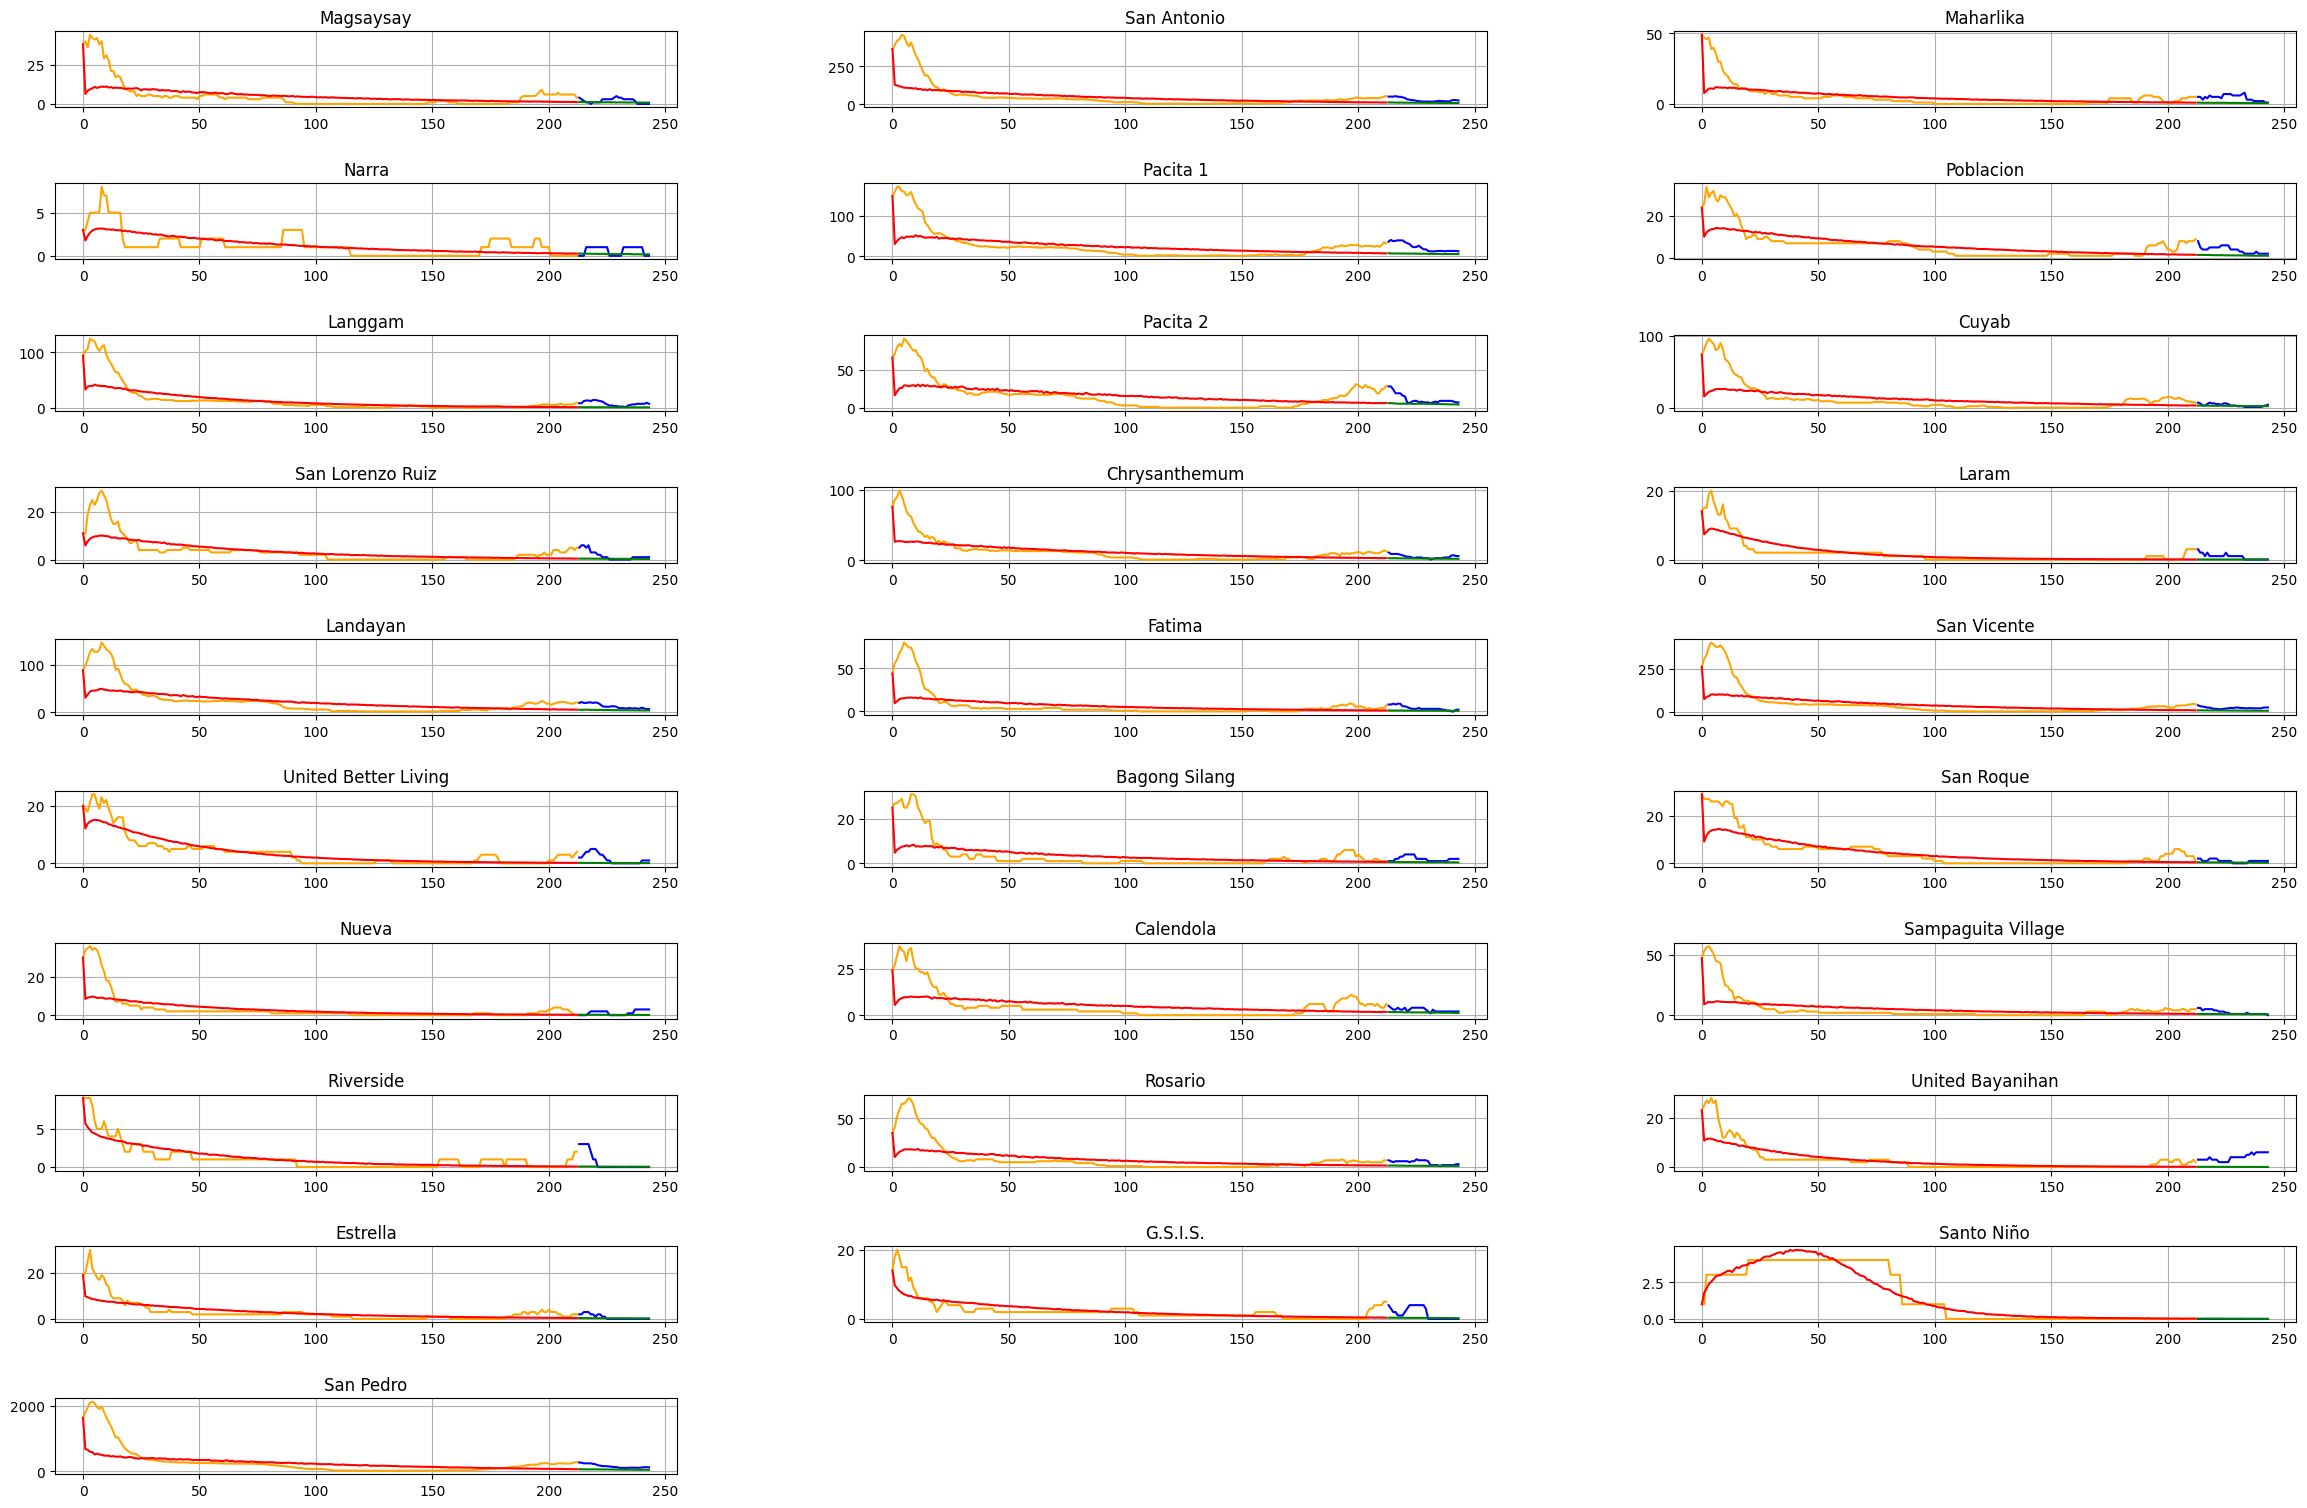

In [54]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
from cmdstanpy import set_cmdstan_path,CmdStanModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.integrate import odeint
import matplotlib.pyplot as plt

cmdstan_path = r'C:\\Users\\jhnbr\\.cmdstan\\cmdstan-2.35.0'
set_cmdstan_path(cmdstan_path)
model = CmdStanModel(stan_file=r'C:\\Users\\jhnbr\\Documents\\Github\SEIR_DJANGO-WebTest\\transformation\dataset\\models\\seir_optimized_fixed_bugs.stan')


df = pd.read_csv("combined_san_pedro_actual_cases.csv", parse_dates=["date"])
barangays = df['barangay_Res'].unique()

metrics_dataset = []
hyperparameter_dataset = []
final_dataset = []
populations = pd.read_csv("C:\\Users\\jhnbr\\Documents\\Github\\SEIR_DJANGO-WebTest\\transformation\\dataset\\SanPedroBarangayPopulation-csv.csv")

# Create a figure for combined subplots
num_barangays = len(barangays)
fig, axes = plt.subplots(nrows=(num_barangays + 2) // 3, ncols=3, figsize=(24, 16))
axes = axes.flatten()




for i, barangay in enumerate(barangays): # loop nung each figure na ilalagay 
    print(barangay)
    population_2022 = populations.loc[populations['barangay_Res'] == barangay.upper(), 'Population'].values[0] 
    train_data = df[ (df['date'] >= '2022-01-13') & (df['date'] <= '2022-08-13') &  (df['barangay_Res'] == barangay)]
    test_data = df[ (df['date'] >= '2022-08-14') & (df['date'] <= '2022-09-13') &  (df['barangay_Res'] == barangay)]


    train_cases = train_data['count_Infectious'].values
    test_cases = test_data['count_Infectious'].values
    train_dates = pd.to_datetime(train_data['date'])
    test_dates = pd.to_datetime(test_data['date'])
    n_days = len(train_dates)
    n_pred_days = len(test_data)
    t0 = 0
    ts = np.arange(1, days + 1, dtype=float)
    
    stan_data = {
        "n_days": n_days,
        "t0": t0,
        "ts": ts,
        "N": population,
        "cases": train_cases.astype(int), 
        "i0": i0,
        "n_pred_days": n_pred_days
    }
    fit = model.sample(data=stan_data, iter_warmup=500, iter_sampling=500, chains=4, parallel_chains=4,adapt_delta=0.9, seed=42)
    generated_cases = fit.stan_variable("pred_cases")
    predicted_cases_future = fit.stan_variable("pred_cases_future")

        # Calculate mean predictions
    mean_generated_cases = np.mean(generated_cases, axis=0)
    mean_predicted_cases_future = np.mean(predicted_cases_future, axis=0)

        
    mae_test = mean_absolute_error(test_cases, mean_predicted_cases_future)
    norm_factor = np.mean(np.abs(test_cases))
    nmae_test = mae_test / norm_factor
    mse_test = mean_squared_error(test_cases, mean_predicted_cases_future)
    rmse_test = mse_test**(1/2)
    

   
    lambda_ = np.mean(fit.stan_variable("infectious_rate"))
    sigma = np.mean(fit.stan_variable("incubation_rate"))
    gamma = np.mean(fit.stan_variable("recovery_rate"))
    beta = lambda_
    gamma = gamma
    print(f'beta: {beta}, gamma: {gamma}, sigma: {sigma}')



    hyperparameters = pd.DataFrame({
    "barangay_Res": [barangay],
    "beta": [beta],
    "gamma": [gamma],
    "sigma": [sigma]
    })

    hyperparameter_dataset.append(hyperparameters)
    # train_solution = odeint(seir_model, initial_conditions, t_train, args=(beta, sigma, gamma))
    # test_initial_conditions = train_solution[-1]  # Start future prediction from the last training state
    # test_solution = odeint(seir_model, test_initial_conditions, t_test, args=(beta, sigma, gamma))
   


    metrics = pd.DataFrame({
    "barangay_Res": [barangay],
    "mae": [mae_test],
    "nmae":[ nmae_test],
    "mse":[mse_test],
    "rmse": [rmse_test]
    })
    metrics_dataset.append(metrics)
    print(f"MAE : {mae_test}, NMAE: {nmae_test}, MSE: {mse_test}, RMSE: {rmse_test}")
    


    t = np.linspace(n_days, n_days + n_pred_days - 1, n_pred_days )
    ts = np.linspace(0, n_days - 1, n_days )


    observed_dates = train_dates
    future_dates = [train_date[-1] + timedelta(days=i) for i in range(1,len(test_data)+1)]
    
    # Combine observed and future predictions
    combined_dates = list(observed_dates) + future_dates
    combined_predictions = list(mean_generated_cases) + list(mean_predicted_cases_future)
    combined_actual = list(train_cases) + list(test_cases)
    print(len(combined_predictions))
    print(len(combined_dates))
    print(len(combined_actual))
    count_prediction = pd.DataFrame({
        "barangay_Res": [barangay] * len(combined_dates),
        "date": combined_dates,
        "prediction": combined_predictions,
        "actual":combined_actual
    })
    final_dataset.append(count_prediction)



    axes[i].plot(ts,train_cases, label='Actual Infected (Train)', color='orange') #papalitan kung ano yung actual plots
    axes[i].plot(ts,mean_generated_cases, label='Predicted Infected (Train)', color='red') #papalitan kung ano yung actual plots
    axes[i].plot(t,test_cases, label='Actual Infected (Test)', color='blue') #papalitan kung ano yung actual plots
    axes[i].plot(t, mean_predicted_cases_future , label='Predicted Infected (Test)', color='green') #papalitan kung ano yung actual plots
    axes[i].set_title(f'{barangay}') #title nung isang graph
    axes[i].grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

final_df = pd.concat(final_dataset, ignore_index=True)
final_df.to_csv("result_bayesian1_prediction.csv", index=False)

final_hyperparameter = pd.concat(hyperparameter_dataset,ignore_index=True)
final_hyperparameter.to_csv("result_bayesian1_hyperparameters.csv", index=False)

final_validation = pd.concat(metrics_dataset,ignore_index=True)
final_validation.to_csv("result_bayesian1_validation.csv", index=False)


fig.tight_layout(pad=4.0)
plt.subplots_adjust(hspace=1, wspace=0.3)  # Adjust vertical and horizontal spacing
plt.show()

# Comparison

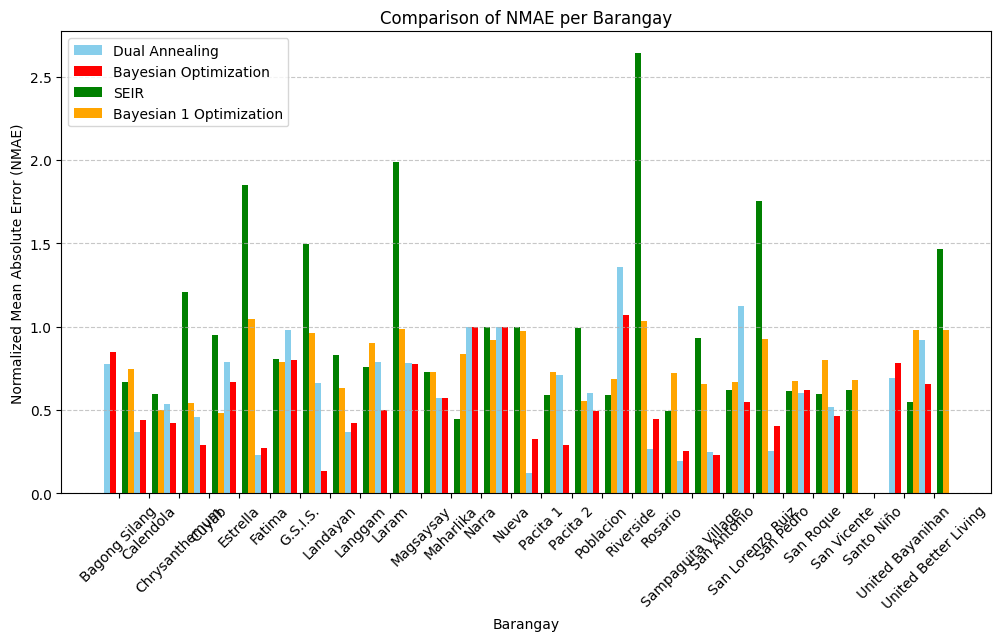

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')
df_seir = pd.read_csv('result_seir_validation.csv')
df_bayesian1 = pd.read_csv('result_bayesian1_validation.csv')
# Sort data by barangay for consistency
df_annealing = df_annealing.sort_values(by='barangay_Res')
df_bayesian = df_bayesian.sort_values(by='barangay_Res')
df_seir = df_seir.sort_values(by='barangay_Res')
df_bayesian1 =df_bayesian1.sort_values(by='barangay_Res')

# Ensure all DataFrames have the same barangay order
if not (df_annealing['barangay_Res'].tolist() == df_bayesian['barangay_Res'].tolist() == df_seir['barangay_Res'].tolist()):
    raise ValueError("Barangay values do not match between datasets. Ensure they have the same order.")

# Define the x locations for the groups
barangays = df_annealing['barangay_Res']
x = np.arange(len(barangays))  # The label locations

# Set bar width
bar_width = 0.2

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bars for each method with correct alignment
plt.bar(x - bar_width*2, df_annealing['nmae'], bar_width, label='Dual Annealing', color='skyblue')
plt.bar(x - bar_width, df_bayesian['nmae'], bar_width, label='Bayesian Optimization', color='red')
plt.bar(x + bar_width, df_seir['nmae'], bar_width, label='SEIR', color='green')
plt.bar(x + bar_width*2, df_bayesian1['nmae'], bar_width, label='Bayesian 1 Optimization', color='orange')
# Labels and title
plt.xlabel('Barangay')
plt.ylabel('Normalized Mean Absolute Error (NMAE)')
plt.title('Comparison of NMAE per Barangay')

# Set x-ticks and labels
plt.xticks(x, barangays, rotation=45)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()


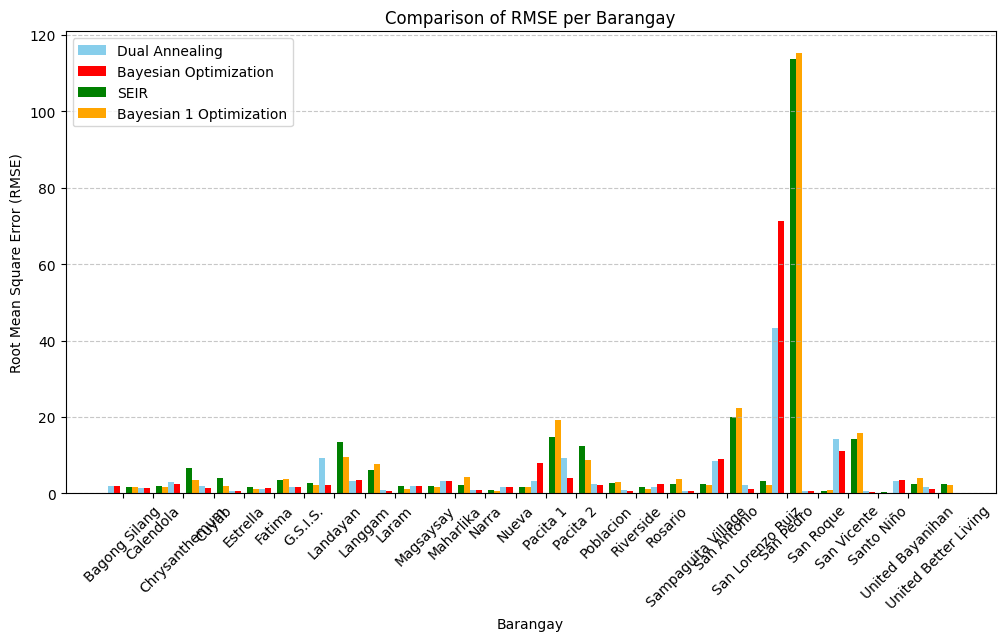

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')
df_seir = pd.read_csv('result_seir_validation.csv')
df_bayesian1 = pd.read_csv('result_bayesian1_validation.csv')
# Sort data by barangay for consistency
df_annealing = df_annealing.sort_values(by='barangay_Res')
df_bayesian = df_bayesian.sort_values(by='barangay_Res')
df_seir = df_seir.sort_values(by='barangay_Res')
df_bayesian1 =df_bayesian1.sort_values(by='barangay_Res')

# Ensure all DataFrames have the same barangay order
if not (df_annealing['barangay_Res'].tolist() == df_bayesian['barangay_Res'].tolist() == df_seir['barangay_Res'].tolist()):
    raise ValueError("Barangay values do not match between datasets. Ensure they have the same order.")

# Define the x locations for the groups
barangays = df_annealing['barangay_Res']
x = np.arange(len(barangays))  # The label locations

# Set bar width
bar_width = 0.2

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bars for each method with correct alignment
plt.bar(x - bar_width*2, df_annealing['rmse'], bar_width, label='Dual Annealing', color='skyblue')
plt.bar(x - bar_width, df_bayesian['rmse'], bar_width, label='Bayesian Optimization', color='red')
plt.bar(x + bar_width, df_seir['rmse'], bar_width, label='SEIR', color='green')
plt.bar(x + bar_width*2, df_bayesian1['rmse'], bar_width, label='Bayesian 1 Optimization', color='orange')
# Labels and title
plt.xlabel('Barangay')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('Comparison of RMSE per Barangay')

# Set x-ticks and labels
plt.xticks(x, barangays, rotation=45)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()


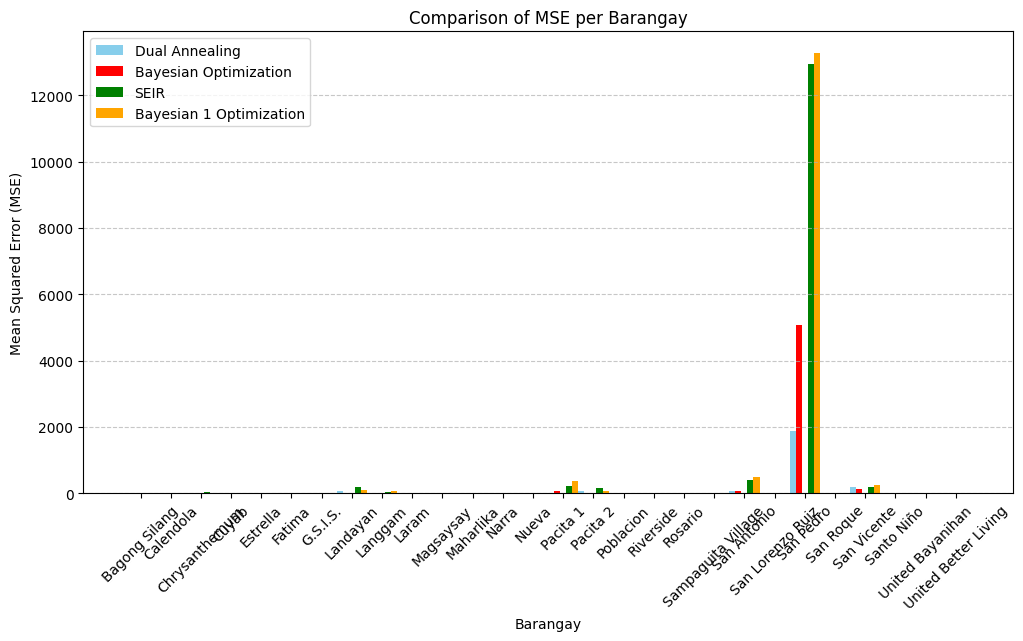

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')

# Sort data by barangay for consisimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')
df_seir = pd.read_csv('result_seir_validation.csv')
df_bayesian1 = pd.read_csv('result_bayesian1_validation.csv')
# Sort data by barangay for consistency
df_annealing = df_annealing.sort_values(by='barangay_Res')
df_bayesian = df_bayesian.sort_values(by='barangay_Res')
df_seir = df_seir.sort_values(by='barangay_Res')
df_bayesian1 =df_bayesian1.sort_values(by='barangay_Res')

# Ensure all DataFrames have the same barangay order
if not (df_annealing['barangay_Res'].tolist() == df_bayesian['barangay_Res'].tolist() == df_seir['barangay_Res'].tolist()):
    raise ValueError("Barangay values do not match between datasets. Ensure they have the same order.")

# Define the x locations for the groups
barangays = df_annealing['barangay_Res']
x = np.arange(len(barangays))  # The label locations

# Set bar width
bar_width = 0.2

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bars for each method with correct alignment
plt.bar(x - bar_width*2, df_annealing['mse'], bar_width, label='Dual Annealing', color='skyblue')
plt.bar(x - bar_width, df_bayesian['mse'], bar_width, label='Bayesian Optimization', color='red')
plt.bar(x + bar_width, df_seir['mse'], bar_width, label='SEIR', color='green')
plt.bar(x + bar_width*2, df_bayesian1['mse'], bar_width, label='Bayesian 1 Optimization', color='orange')
# Labels and title
plt.xlabel('Barangay')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE per Barangay')

# Set x-ticks and labels
plt.xticks(x, barangays, rotation=45)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()



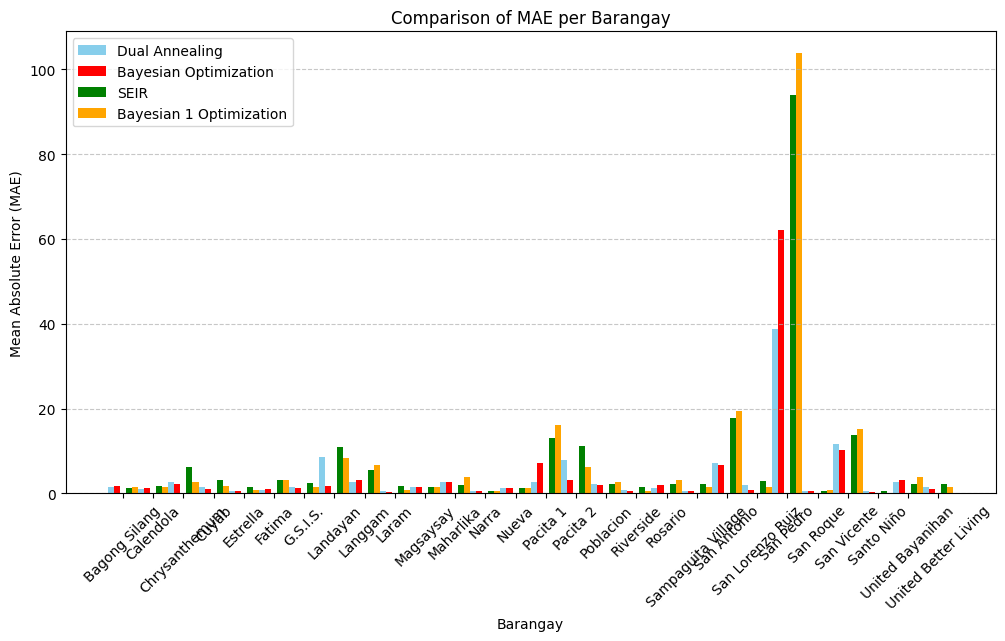

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')

# Sort data by barangay for consisimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_annealing = pd.read_csv('result_annealing_validation.csv')
df_bayesian = pd.read_csv('result_bayesian_validation.csv')
df_seir = pd.read_csv('result_seir_validation.csv')
df_bayesian1 = pd.read_csv('result_bayesian1_validation.csv')
# Sort data by barangay for consistency
df_annealing = df_annealing.sort_values(by='barangay_Res')
df_bayesian = df_bayesian.sort_values(by='barangay_Res')
df_seir = df_seir.sort_values(by='barangay_Res')
df_bayesian1 =df_bayesian1.sort_values(by='barangay_Res')

# Ensure all DataFrames have the same barangay order
if not (df_annealing['barangay_Res'].tolist() == df_bayesian['barangay_Res'].tolist() == df_seir['barangay_Res'].tolist()):
    raise ValueError("Barangay values do not match between datasets. Ensure they have the same order.")

# Define the x locations for the groups
barangays = df_annealing['barangay_Res']
x = np.arange(len(barangays))  # The label locations

# Set bar width
bar_width = 0.2

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bars for each method with correct alignment
plt.bar(x - bar_width*2, df_annealing['mae'], bar_width, label='Dual Annealing', color='skyblue')
plt.bar(x - bar_width, df_bayesian['mae'], bar_width, label='Bayesian Optimization', color='red')
plt.bar(x + bar_width, df_seir['mae'], bar_width, label='SEIR', color='green')
plt.bar(x + bar_width*2, df_bayesian1['mae'], bar_width, label='Bayesian 1 Optimization', color='orange')
# Labels and title
plt.xlabel('Barangay')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE per Barangay')

# Set x-ticks and labels
plt.xticks(x, barangays, rotation=45)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

